## Project Description

Problem

• Value of wine: quality vs. price

• Market assumes it is efficient: price a predictor of quality?

–Price ↑ quality ↓ - poor value

–Price ↓ quality ↓ - poor/average value

–Price ↑ quality ↑ - average value

–Price ↓ quality ↑ - high value

• What is quality? Are other variables a better predictor of value?

Hypothesis

Price is not perfectly correlated with quality

Quality, price and value may be predicted by year, varietal, appelation, vineyard, geo location, wine descriptors, weather data, etc.

Data

wine.com api / wunderground.com api

– Price Min, Price Max, Year, Appellation, Varietal, Wine Type, Vineyard, Reviews, Geo Location, Ratings


# Import Packages/Libraries

In [235]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as scipy
import scipy.stats as stats
import numpy as np

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 40)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

# Import Data

In [236]:
df = pd.read_csv(os.path.join('..', '..', 'final-project', '2', 'ALL WINE DATA 2014 10 21.csv'))
                  
df.head(5)

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,ProductAttributes/ProductAttribute_Name2,Ratings_HighestScore,Community/Reviews_HighestScore,Appellation_Url,Appellation/Region_Url,Url,Varietal_Url,Varietal/WineType_Url,Vineyard_Url,Vineyard_ImageUrl,Vineyard/GeoLocation_Latitude,Vineyard/GeoLocation_Longitude,Vineyard/GeoLocation_Url,ProductAttributes/ProductAttribute_Url,ProductAttributes/ProductAttribute_ImageUrl,Labels/Label_Id,Labels/Label_Name,Labels/Label_Url,Community_Url,Community/Reviews_HighestScore.1
0,6,Argyle Reserve Pinot Noir 1996,1996,Wine,31.990,31.990,31.99,2474.0,Willamette Valley,103.0,Oregon,United States,143.0,Pinot Noir,124.0,Red Wines,8182.0,Argyle,NaN,NaN,NaN,0.0,0.0,http://www.wine.com/v6/Willamette-Valley/wine/...,http://www.wine.com/v6/Oregon/wine/list.aspx?N...,http://www.wine.com/v6/Argyle-Reserve-Pinot-No...,http://www.wine.com/v6/Pinot-Noir/wine/list.as...,http://www.wine.com/v6/Red-Wines/wine/list.asp...,http://www.wine.com/v6/Argyle/learnabout.aspx?...,http://cache.wine.com/aboutwine/basics/images/...,-360.0,-360.0,http://www.wine.com/v6/aboutwine/mapof.aspx?wi...,NaN,NaN,6m,thumbnail,http://cache.wine.com/labels/6m.jpg,http://www.wine.com/v6/Argyle-Reserve-Pinot-No...,0.0
1,10,Chalk Hill Chardonnay 1997,1997,Wine,47.990,31.990,34.99,2371.0,Sonoma County,101.0,California,United States,140.0,Chardonnay,125.0,White Wines,8680.0,Chalk Hill Winery,NaN,NaN,NaN,92.0,0.0,http://www.wine.com/v6/Sonoma-County/wine/list...,http://www.wine.com/v6/California/wine/list.as...,http://www.wine.com/v6/Chalk-Hill-Chardonnay-1...,http://www.wine.com/v6/Chardonnay/wine/list.as...,http://www.wine.com/v6/White-Wines/wine/list.a...,http://www.wine.com/v6/Chalk-Hill-Winery/learn...,http://cache.wine.com/aboutwine/basics/images/...,-360.0,-360.0,http://www.wine.com/v6/aboutwine/mapof.aspx?wi...,NaN,NaN,10m,thumbnail,http://cache.wine.com/labels/10m.jpg,http://www.wine.com/v6/Chalk-Hill-Chardonnay-1...,0.0
2,17,Franciscan Chardonnay 1998,1998,Wine,17.991,17.991,19.99,2398.0,Napa Valley,101.0,California,United States,140.0,Chardonnay,125.0,White Wines,8800.0,Franciscan Oakville Estate,NaN,NaN,NaN,90.0,0.0,http://www.wine.com/v6/Napa-Valley/wine/list.a...,http://www.wine.com/v6/California/wine/list.as...,http://www.wine.com/v6/Franciscan-Chardonnay-1...,http://www.wine.com/v6/Chardonnay/wine/list.as...,http://www.wine.com/v6/White-Wines/wine/list.a...,http://www.wine.com/v6/Franciscan-Oakville-Est...,http://cache.wine.com/aboutwine/basics/images/...,-360.0,-360.0,http://www.wine.com/v6/aboutwine/mapof.aspx?wi...,NaN,NaN,17m,thumbnail,http://cache.wine.com/labels/17m.jpg,http://www.wine.com/v6/Franciscan-Chardonnay-1...,0.0
3,20,Sterling Chardonnay 1998,1998,Wine,23.990,19.990,23.99,2416.0,North Coast,101.0,California,United States,140.0,Chardonnay,125.0,White Wines,8074.0,Sterling Vineyards,NaN,NaN,NaN,0.0,0.0,http://www.wine.com/v6/North-Coast/wine/list.a...,http://www.wine.com/v6/California/wine/list.as...,http://www.wine.com/v6/Sterling-Chardonnay-199...,http://www.wine.com/v6/Chardonnay/wine/list.as...,http://www.wine.com/v6/White-Wines/wine/list.a...,http://www.wine.com/v6/Sterling-Vineyards/lear...,http://cache.wine.com/aboutwine/basics/images/...,-360.0,-360.0,http://www.wine.com/v6/aboutwine/mapof.aspx?wi...,NaN,NaN,20m,thumbnail,http://cache.wine.com/labels/20m.jpg,http://www.wine.com/v6/Sterling-Chardonnay-199...,0.0
4,22,Robert Mondavi Fume Blanc 1997,1997,Wine,15.990,15.990,15.99,2398.0,Napa Valley,101.0,California,United States,151.0,Sauvignon Blanc,125.0,White Wines,8844.0,Robert Mondavi Winery,NaN,NaN,NaN,87.0,0.0,http://www.wine.com/v6/Napa-Valley/wine/list.a...,http://www.wine.com/v6/California/wine/list.as...,http://www.wine.com/v6/R

# Explore data

In [237]:
df.shape

(74025, 40)

In [238]:
df.dtypes

Id                                              object
Name                                            object
Vintage                                         object
Type                                            object
PriceMax                                       float64
PriceMin                                       float64
PriceRetail                                    float64
Appellation_Id                                 float64
Appellation_Name                                object
Appellation/Region_Id                          float64
Appellation/Region_Name                         object
Appelation Country                              object
Varietal_Id                                    float64
Varietal_Name                                   object
Varietal/WineType_Id                           float64
Varietal/WineType_Name                          object
Vineyard_Id                                    float64
Vineyard_Name                                   object
ProductAtt

In [239]:
df.count()

Id                                             74025
Name                                           74024
Vintage                                        72539
Type                                           74004
PriceMax                                       74024
PriceMin                                       74024
PriceRetail                                    74024
Appellation_Id                                 73754
Appellation_Name                               73648
Appellation/Region_Id                          73754
Appellation/Region_Name                        73648
Appelation Country                             73648
Varietal_Id                                    73754
Varietal_Name                                  73751
Varietal/WineType_Id                           73754
Varietal/WineType_Name                         73751
Vineyard_Id                                    73754
Vineyard_Name                                  73754
ProductAttributes/ProductAttribute_Id         

In [240]:
df.isnull().sum()

Id                                                 0
Name                                               1
Vintage                                         1486
Type                                              21
PriceMax                                           1
PriceMin                                           1
PriceRetail                                        1
Appellation_Id                                   271
Appellation_Name                                 377
Appellation/Region_Id                            271
Appellation/Region_Name                          377
Appelation Country                               377
Varietal_Id                                      271
Varietal_Name                                    274
Varietal/WineType_Id                             271
Varietal/WineType_Name                           274
Vineyard_Id                                      271
Vineyard_Name                                    271
ProductAttributes/ProductAttribute_Id         

# Drop NaNs, 0's in price, non-wines and superflous columns

In [241]:
list(df.columns.values)

['Id',
 'Name',
 'Vintage',
 'Type',
 'PriceMax',
 'PriceMin',
 'PriceRetail',
 'Appellation_Id',
 'Appellation_Name',
 'Appellation/Region_Id',
 'Appellation/Region_Name',
 'Appelation Country',
 'Varietal_Id',
 'Varietal_Name',
 'Varietal/WineType_Id',
 'Varietal/WineType_Name',
 'Vineyard_Id',
 'Vineyard_Name',
 'ProductAttributes/ProductAttribute_Id',
 'ProductAttributes/ProductAttribute_Name',
 'ProductAttributes/ProductAttribute_Name2',
 'Ratings_HighestScore',
 'Community/Reviews_HighestScore',
 'Appellation_Url',
 'Appellation/Region_Url',
 'Url',
 'Varietal_Url',
 'Varietal/WineType_Url',
 'Vineyard_Url',
 'Vineyard_ImageUrl',
 'Vineyard/GeoLocation_Latitude',
 'Vineyard/GeoLocation_Longitude',
 'Vineyard/GeoLocation_Url',
 'ProductAttributes/ProductAttribute_Url',
 'ProductAttributes/ProductAttribute_ImageUrl',
 'Labels/Label_Id',
 'Labels/Label_Name',
 'Labels/Label_Url',
 'Community_Url',
 'Community/Reviews_HighestScore.1']

# Dropping columns:


Appellation_Url	
Appellation/Region_Url	
Url	
Varietal_Url	
Varietal/WineType_Url	
Vineyard_Url	
Vineyard_ImageUrl	
Vineyard/GeoLocation_Latitude	
Vineyard/GeoLocation_Longitude	
Vineyard/GeoLocation_Url	
ProductAttributes/ProductAttribute_Url	
ProductAttributes/ProductAttribute_ImageUrl	
Labels/Label_Id	
Labels/Label_Name	
Labels/Label_Url	
Community_Url

In [242]:
df.drop(['Appellation_Url', 'Appellation/Region_Url', 'Url', 'Varietal_Url', 'Varietal/WineType_Url', 'Vineyard_Url', 'Vineyard_ImageUrl', 'Vineyard/GeoLocation_Latitude' , 'Vineyard/GeoLocation_Longitude', 'Vineyard/GeoLocation_Url', 'ProductAttributes/ProductAttribute_Url', 'ProductAttributes/ProductAttribute_ImageUrl', 'Labels/Label_Id', 'Labels/Label_Name', 'Labels/Label_Url', 'Community_Url'], inplace = True, axis = 1)

In [243]:
df.head(5)

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,ProductAttributes/ProductAttribute_Name2,Ratings_HighestScore,Community/Reviews_HighestScore,Community/Reviews_HighestScore.1
0,6,Argyle Reserve Pinot Noir 1996,1996,Wine,31.990,31.990,31.99,2474.0,Willamette Valley,103.0,Oregon,United States,143.0,Pinot Noir,124.0,Red Wines,8182.0,Argyle,NaN,NaN,NaN,0.0,0.0,0.0
1,10,Chalk Hill Chardonnay 1997,1997,Wine,47.990,31.990,34.99,2371.0,Sonoma County,101.0,California,United States,140.0,Chardonnay,125.0,White Wines,8680.0,Chalk Hill Winery,NaN,NaN,NaN,92.0,0.0,0.0
2,17,Franciscan Chardonnay 1998,1998,Wine,17.991,17.991,19.99,2398.0,Napa Valley,101.0,California,United States,140.0,Chardonnay,125.0,White Wines,8800.0,Franciscan Oakville Estate,NaN,NaN,NaN,90.0,0.0,0.0
3,20,Sterling Chardonnay 1998,1998,Wine,23.990,19.990,23.99,2416.0,North Coast,101.0,California,United States,140.0,Chardonnay,125.0,White Wines,8074.0,Sterling Vineyards,NaN,NaN,NaN,0.0,0.0,0.0
4,22,Robert Mondavi Fume Blanc 1997,1997,Wine,15.990,15.990,15.99,2398.0,Napa Valley,101.0,California,United States,151.0,Sauvignon Blanc,125.0,White Wines,8844.0,Robert Mondavi Winery,NaN,NaN,NaN,87.0,0.0,0.0


# Drop wines without price

In [244]:
df.dropna(subset = ['PriceMax', 'PriceMin', 'PriceRetail'], inplace = True)

In [245]:
df.shape

(74024, 24)

# Cursory check of values

In [246]:
for col in df:
    print df[col].unique()

[6L 10L 17L ..., '135868' '135869' '135871']
['Argyle Reserve Pinot Noir 1996' 'Chalk Hill Chardonnay 1997'
 'Franciscan Chardonnay 1998' ..., 'Henschke Mt. Edelstone Shiraz 2012'
 'Henschke Hill of Grace Shiraz 2009'
 'Vasse Felix Heytesbury Red Blend 2011']
['1996' '1997' '1998' nan '1995' '2000' '1990' '1993' '1994' '1992' '1991'
 '1989' '1986' '1988' '1977' ' Dry' '1999' '1984' '1982' '1980' '1985'
 '1983' '1968' '1979' '1978' '1970' '1971' '1961' '1975' '1967' '1966'
 '1950' '1953' '0ML)' '1937' '1941' '1964' '1974' '1976' '1981' ' Red'
 '1987' ' ML)' '0ml)' '1972' '2001' '.5L)' '2005' '1912' '1963' '.8L)'
 ' Cru' ' Dog' '/78)' '/80)' '1973' '.0L)' ' Box' '2011' '2002' '2008'
 '1933' '1962' '1945' '1921' '1955' '1958' ' ml)' ' Sky' '1954' '2010'
 '1922' ' Lee' '1959' '2009' '2003' '2004' ' Ina' '1940' '2007' '1910'
 '1934' ' N/V' '2006' '1944' ' Tin' '* *' ' Set' '1948' ' DOC' ' VII'
 '2012' ' Kit' '(II)' '1952' '1969' '2013' ' IGT' ' Bag' '1908' ' Mat'
 ' E-2' ' F-2' ' I-1' '2014

# Limit data to just wine

In [247]:
df = df[df.Type == 'Wine']

In [248]:
df.shape

(73794, 24)

In [249]:
df.Type.unique()

array(['Wine'], dtype=object)

# Non-wine data still in the dataset

In [250]:
df['Varietal/WineType_Name'].unique()

array(['Red Wines', 'White Wines', 'Champagne & Sparkling', 'Ros\xe9 Wine',
       'Dessert, Fortified & Fruit Wines', 'Sake', 'Liqueur', 'Tequila',
       nan, 'Whisky', 'Vodka', 'Brandy'], dtype=object)

In [251]:
df['Varietal/WineType_Name'].nunique()

11

In [252]:
df['Varietal/WineType_Name'].value_counts()

Red Wines                           47408
White Wines                         21632
Champagne & Sparkling                1844
Dessert, Fortified & Fruit Wines     1705
Ros� Wine                            1083
Sake                                   71
Tequila                                 2
Liqueur                                 2
Whisky                                  2
Brandy                                  1
Vodka                                   1
Name: Varietal/WineType_Name, dtype: int64

# Drop non-wine data completely

In [253]:
df = df[~df['Varietal/WineType_Name'].isin(['Sake', 'Liqueur', 'Tequila', 'Whisky', 'Vodka', 'Brandy', ''])]

In [254]:
df.shape

(73715, 24)

# Check nulls

In [255]:
df.isnull().sum()

Id                                              0
Name                                            0
Vintage                                      1290
Type                                            0
PriceMax                                        0
PriceMin                                        0
PriceRetail                                     0
Appellation_Id                                 40
Appellation_Name                              132
Appellation/Region_Id                          40
Appellation/Region_Name                       132
Appelation Country                            132
Varietal_Id                                    40
Varietal_Name                                  43
Varietal/WineType_Id                           40
Varietal/WineType_Name                         43
Vineyard_Id                                    40
Vineyard_Name                                  40
ProductAttributes/ProductAttribute_Id       39637
ProductAttributes/ProductAttribute_Name     39637


# Suspect duplication of columns

In [256]:
df[['Community/Reviews_HighestScore', 'Community/Reviews_HighestScore.1']].corr()

,Community/Reviews_HighestScore,Community/Reviews_HighestScore.1
Community/Reviews_HighestScore,1.0,1.0
Community/Reviews_HighestScore.1,1.0,1.0


In [257]:
df.drop('Community/Reviews_HighestScore.1', axis = 1, inplace = True)

list(df.columns.values)

['Id',
 'Name',
 'Vintage',
 'Type',
 'PriceMax',
 'PriceMin',
 'PriceRetail',
 'Appellation_Id',
 'Appellation_Name',
 'Appellation/Region_Id',
 'Appellation/Region_Name',
 'Appelation Country',
 'Varietal_Id',
 'Varietal_Name',
 'Varietal/WineType_Id',
 'Varietal/WineType_Name',
 'Vineyard_Id',
 'Vineyard_Name',
 'ProductAttributes/ProductAttribute_Id',
 'ProductAttributes/ProductAttribute_Name',
 'ProductAttributes/ProductAttribute_Name2',
 'Ratings_HighestScore',
 'Community/Reviews_HighestScore']

In [258]:
df['ProductAttributes/ProductAttribute_Name'].unique()

array([nan, 'Collectible Wines', 'Great Bottles to Give', 'Big & Bold',
       'Champagne Gifts', 'Business Gifts', 'Green Wines', 'Sweet Wine',
       'Boutique Wines', 'Kosher Wines', 'Fruity & Smooth',
       'Older Vintages', 'Screw Cap Wines', 'Smooth & Supple',
       'Earthy & Spicy', 'Light & Fruity', 'Rich & Creamy',
       'Light & Crisp', 'Wedding', 'Has Video', 'Gifts for Her',
       'Charitable Wine', 'Wine Gift Sets', 'Bordeaux Futures'], dtype=object)

In [259]:
df['ProductAttributes/ProductAttribute_Name2'].unique()

array([nan, 'Big & Bold', 'Fruity & Smooth', 'Smooth & Supple',
       'Earthy & Spicy', 'Light & Fruity', 'Rich & Creamy', 'Light & Crisp'], dtype=object)

In [260]:
df_subset = df[df['ProductAttributes/ProductAttribute_Name'].notnull() & df['ProductAttributes/ProductAttribute_Name2'].notnull()]

(df_subset[['ProductAttributes/ProductAttribute_Name','ProductAttributes/ProductAttribute_Name2']]).head(10)

,ProductAttributes/ProductAttribute_Name,ProductAttributes/ProductAttribute_Name2
84,Big & Bold,Big & Bold
512,Fruity & Smooth,Fruity & Smooth
612,Big & Bold,Big & Bold
1318,Big & Bold,Big & Bold
2653,Smooth & Supple,Smooth & Supple
3186,Smooth & Supple,Smooth & Supple
4243,Smooth & Supple,Smooth & Supple
4394,Big & Bold,Big & Bold
4463,Earthy & Spicy,Earthy & Spicy
5601,Light & Fruity,Light & Fruity


In [261]:
(df_subset['ProductAttributes/ProductAttribute_Name'] == df_subset['ProductAttributes/ProductAttribute_Name2']).unique()

array([True], dtype=object)

In [262]:
df.drop('ProductAttributes/ProductAttribute_Name2', axis = 1, inplace = True)

list(df.columns.values)

['Id',
 'Name',
 'Vintage',
 'Type',
 'PriceMax',
 'PriceMin',
 'PriceRetail',
 'Appellation_Id',
 'Appellation_Name',
 'Appellation/Region_Id',
 'Appellation/Region_Name',
 'Appelation Country',
 'Varietal_Id',
 'Varietal_Name',
 'Varietal/WineType_Id',
 'Varietal/WineType_Name',
 'Vineyard_Id',
 'Vineyard_Name',
 'ProductAttributes/ProductAttribute_Id',
 'ProductAttributes/ProductAttribute_Name',
 'Ratings_HighestScore',
 'Community/Reviews_HighestScore']

# Check data for anomalies

In [263]:
df['Vintage'].unique()

array(['1996', '1997', '1998', nan, '1995', '2000', '1990', '1993', '1994',
       '1992', '1991', '1989', '1986', '1988', '1977', ' Dry', '1999',
       '1984', '1982', '1980', '1985', '1983', '1968', '1979', '1978',
       '1970', '1971', '1961', '1975', '1967', '1966', '1950', '1953',
       '0ML)', '1937', '1941', '1964', '1974', '1976', '1981', ' Red',
       '1987', ' ML)', '0ml)', '1972', '2001', '.5L)', '2005', '1912',
       '1963', ' Cru', ' Dog', '/78)', '/80)', '1973', '.0L)', ' Box',
       '2011', '2002', '2008', '1933', '1962', '1945', '1921', '1955',
       '1958', ' ml)', '1954', '2010', '1922', ' Lee', '1959', '2009',
       '2003', '2004', ' Ina', '1940', '2007', '1910', '1934', ' N/V',
       '2006', '1944', '* *', ' Set', '1948', ' DOC', ' VII', '2012',
       '(II)', '1952', '1969', '2013', ' IGT', ' Bag', '1908', ' E-2',
       ' F-2', ' I-1', '2014'], dtype=object)

In [264]:
df['Appellation_Name'].unique()

array(['Willamette Valley', 'Sonoma County', 'Napa Valley', 'North Coast',
       'Columbia Valley', 'Carneros', 'Central Coast', 'Other California',
       'Russian River', 'Yakima Valley', 'Champagne', 'Other Australia',
       'Barossa Valley', 'Coonawarra', 'Hunter Valley', 'Margaux', 'Medoc',
       'Burgundy', 'Alsace', 'Chateauneuf-du-Pape', 'Cotes du Rhone',
       'Trentino-Alto Adige', 'Southern Italy', 'Friuli-Venezia Giulia',
       'Tuscany', 'Veneto', 'Chile', 'Piedmont', 'Other Bordeaux',
       'South Africa', 'Rogue River Valley', 'Mosel-Saar-Ruwer',
       'Other German', 'Other Spain', 'Portugal', 'Pessac-Leognan',
       'Pauillac', 'South Australia', 'Other Oregon', 'Rioja', 'Condrieu',
       'McLaren Vale', 'Other New Zealand', 'St. Estephe',
       'Walla Walla Valley', 'Umpqua Valley', 'Victoria',
       'Sierra Foothills', 'Hermitage', 'Cote Rotie', 'Virginia',
       'Beaujolais', 'Sauternes and Barsac', 'Other French',
       'Languedoc-Roussillon', 'Argenti

In [265]:
df['Appellation/Region_Name'].unique()

array(['Oregon', 'California', 'Washington', 'France - Other regions',
       'Australia', 'France - Bordeaux', 'France - Rhone', 'Italy',
       'South America', 'South Africa', 'Germany', 'Spain', 'Portugal',
       'New Zealand', 'Other US', 'Unknown', 'Other Europe', 'Israel',
       'Greece', nan, 'Canada', 'Japan', 'Mexico'], dtype=object)

In [266]:
df['Appelation Country'].unique()

array(['United States', 'France', 'Australia', 'Italy', 'South America',
       'South Africa', 'Germany', 'Spain', 'Portugal', 'New Zealand',
       'Unknown', 'Other Europe', 'Israel', 'Greece', nan, 'Canada',
       'Japan', 'Mexico'], dtype=object)

In [267]:
df['Varietal_Name'].unique()

array(['Pinot Noir', 'Chardonnay', 'Sauvignon Blanc', 'Merlot', 'Ros\xe9',
       'Cabernet Sauvignon', 'Pinot Gris/Grigio', 'Bordeaux Red Blends',
       'Zinfandel', 'Riesling', 'Vintage', 'Non-Vintage', 'Sangiovese',
       'Syrah/Shiraz', 'Rhone Red Blends', 'Other Red Blends',
       'Other White Blends', 'Other Red Wine', 'Viognier', 'Pinot Blanc',
       'Gamay', 'Chenin Blanc', 'Nebbiolo', 'Rose', 'Gewurztraminer',
       'Rhone White Blends', 'Other White Wine', 'Pinotage',
       'Other Dessert', 'Muscat', 'Barbera', 'Sherry', 'Madeira', 'Port',
       'Vermouth', 'Tempranillo', 'Bordeaux White Blends', 'Petite Sirah',
       'Cabernet Franc', 'Mourvedre', 'Malbec', 'Fruit Wine', 'Dolcetto',
       'Semillon', 'Grenache', "Nero d'Avola", 'Primitivo', 'Albarino',
       'Carmenere', 'Gruner Veltliner', 'Torrontes', nan, 'Chianti'], dtype=object)

In [268]:
df['Varietal/WineType_Name'].unique()

array(['Red Wines', 'White Wines', 'Champagne & Sparkling', 'Ros\xe9 Wine',
       'Dessert, Fortified & Fruit Wines', nan], dtype=object)

In [269]:
df['Vineyard_Name'].unique()

array(['Argyle', 'Chalk Hill Winery', 'Franciscan Oakville Estate', ...,
       'Comte Armand Les Domaine des Epeneaux', 'Haegelen-Jayer',
       'Kobalt Wines'], dtype=object)

In [270]:
df['Ratings_HighestScore'].unique()

array([   0.,   92.,   90.,   87.,   85.,   88.,   89.,   91.,   93.,
         86.,   95.,   94.,   96.,  100.,   97.,   99.,   98.,   84.])

In [271]:
df['Community/Reviews_HighestScore'].unique()

array([ 0.,  4.,  5.,  3.,  2.,  1.])

In [272]:
df['Appellation_Id'].unique()

array([  2.47400000e+03,   2.37100000e+03,   2.39800000e+03,
         2.41600000e+03,   2.41400000e+03,   2.45400000e+03,
         2.46200000e+03,   2.38800000e+03,   1.86300000e+03,
         2.05200000e+03,   2.33100000e+03,   2.40500000e+03,
         9.05800000e+03,   9.06000000e+03,   9.06100000e+03,
         1.00400000e+04,   1.00410000e+04,   2.45700000e+03,
         2.14800000e+03,   1.00570000e+04,   1.00610000e+04,
         2.27900000e+03,   2.14300000e+03,   2.31000000e+03,
         2.45200000e+03,   2.35200000e+03,   2.42800000e+03,
         2.43100000e+03,   2.26300000e+03,   2.28300000e+03,
         2.15700000e+03,   2.26800000e+03,   1.65000000e+03,
         9.06500000e+03,   2.37700000e+03,   1.00510000e+04,
         1.00490000e+04,   1.00780000e+04,   2.15800000e+03,
         2.37000000e+03,   1.00540000e+04,   9.06300000e+03,
         2.27300000e+03,   1.00440000e+04,   1.95600000e+03,
         2.19500000e+03,   1.00770000e+04,   2.28800000e+03,
         1.00550000e+04,

In [273]:
df[df['Appellation_Id'] == -2147483648]

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,Ratings_HighestScore,Community/Reviews_HighestScore
833,5452,Horton Vidal Blanc 1995,1995,Wine,15.990,9.990,11.99,-2.147484e+09,Virginia,1.110000e+02,Other US,United States,1.480000e+02,Other White Blends,125.0,White Wines,7468.0,Horton Vineyards,NaN,NaN,0.0,0.0
834,5454,Horton Mourvedre 1994,1994,Wine,15.990,15.490,15.99,-2.147484e+09,Virginia,1.110000e+02,Other US,United States,1.008300e+04,Mourvedre,124.0,Red Wines,7468.0,Horton Vineyards,NaN,NaN,0.0,0.0
835,5455,Horton Cabernet Franc 1995,1995,Wine,14.490,14.490,16.99,-2.147484e+09,Virginia,1.110000e+02,Other US,United States,1.970000e+02,Cabernet Franc,124.0,Red Wines,7468.0,Horton Vineyards,NaN,NaN,0.0,0.0
1074,6099,Grgic (Croatia) Plavac Mali Dingac 1997,1997,Wine,28.990,28.990,28.99,-2.147484e+09,Unknown,-2.147484e+09,Unknown,Unknown,1.450000e+02,Other Red Blends,124.0,Red Wines,9554.0,Grgic,NaN,NaN,0.0,5.0
2948,10951,Barboursville Cabernet Franc 1997,1997,Wine,21.490,21.490,21.49,-2.147484e+09,Virginia,1.110000e+02,Other US,United States,1.970000e+02,Cabernet Franc,124.0,Red Wines,7462.0,Barboursville Vineyards,NaN,NaN,0.0,0.0
2949,10952,Barboursville Chardonnay 1998,1998,Wine,18.490,18.490,18.49,-2.147484e+09,Virginia,1.110000e+02,Other US,United States,1.400000e+02,Chardonnay,125.0,White Wines,7462.0,Barboursville Vineyards,NaN,NaN,0.0,0.0
2950,10955,Barboursville Pinot Grigio 1999,1999,Wine,15.990,15.990,15.99,-2.147484e+09,Virginia,1.110000e+02,Other US,United States,1.940000e+02,Pinot Gris/Grigio,125.0,White Wines,7462.0,Barboursville Vineyards,NaN,NaN,0.0,0.0
2951,10956,Barboursville Pinot Noir 1998,1998,Wine,15.990,15.990,15.99,-2.147484e+09,Virginia,1.110000e+02,Other US,United States,1.430000e+02,Pinot Noir,124.0,Red Wines,7462.0,Barboursville Vineyards,NaN,NaN,0.0,0.0
3156,11812,Kiona Cabernet-Merlot 1997,1997,Wine,14.490,14.490,14.49,-2.147484e+09,Unknown,-2.147484e+09,Unknown,Unknown,1.440000e+02,Bordeaux Red Blends,124.0,Red Wines,8961.0,Kiona,NaN,NaN,0.0,0.0
3224,12331,Gruet Blanc de Noirs (375ML half-bottle),NaN,Wine,13.990,7.990,7.99,-2.147484e+09,Other Washington,1.040000e+02,Washington,United States,1.820000e+02,Non-Vintage,123.0,Champagne & Sparkling,8419.0,Gruet,NaN,NaN,90.0,0.0


In [274]:
df = df[df['Appellation_Id'] != -2147483648]

In [275]:
df['Appellation_Id'].unique()

array([  2474.,   2371.,   2398.,   2416.,   2414.,   2454.,   2462.,
         2388.,   1863.,   2052.,   2331.,   2405.,   9058.,   9060.,
         9061.,  10040.,  10041.,   2457.,   2148.,  10057.,  10061.,
         2279.,   2143.,   2310.,   2452.,   2352.,   2428.,   2431.,
         2263.,   2283.,   2157.,   2268.,   1650.,   9065.,   2377.,
        10051.,  10049.,  10078.,   2158.,   2370.,  10054.,   9063.,
         2273.,  10044.,   1956.,   2195.,  10077.,   2288.,  10055.,
        10053.,   2397.,  10046.,   2312.,   2374.,   2089.,  10043.,
        10042.,  10050.,  10045.,  10047.,    943.,  10071.,  10074.,
         1837.,   2375.,   2309.,   1867.,   2124.,   1726.,  10058.,
        10059.,   2333.,   9067.,  10069.,   9064.,   2097.,   2341.,
        10048.,   9059.,   1455.,   2338.,  10056.,   9062.,  10068.,
         1781.,  10065.,   9066.,  10075.,  10072.,  10062.,    607.,
        10070.,  10064.,  10060.,    965.,  10076.,  10066.,  10073.,
        10067.,  100

In [276]:
df['Appellation/Region_Id'].unique()

array([   103.,    101.,    104.,    102.,    108.,  10038.,  10039.,
          105.,    112.,    113.,    106.,    109.,    107.,    114.,
          118.,    111.,    119.,    115.,    121.,    122.,     nan,
        15427.])

In [277]:
df['Varietal_Id'].unique()

array([  1.43000000e+02,   1.40000000e+02,   1.51000000e+02,
         1.38000000e+02,  -2.14748365e+09,   1.39000000e+02,
         1.94000000e+02,   1.44000000e+02,   1.41000000e+02,
         1.53000000e+02,   1.42000000e+02,   1.82000000e+02,
         1.63000000e+02,   1.46000000e+02,   1.00820000e+04,
         1.45000000e+02,   1.48000000e+02,   1.95000000e+02,
         1.62000000e+02,   1.68000000e+02,   1.50000000e+02,
         1.65000000e+02,   1.70000000e+02,   1.66000000e+02,
         1.01130000e+04,   1.96000000e+02,   1.00850000e+04,
         1.60000000e+02,   1.73000000e+02,   1.72000000e+02,
         1.57000000e+02,   1.54000000e+02,   1.55000000e+02,
         1.56000000e+02,   1.47000000e+02,   1.69000000e+02,
         2.21000000e+02,   1.76000000e+02,   1.97000000e+02,
         1.00790000e+04,   1.00830000e+04,   1.83000000e+02,
         1.77000000e+02,   1.00800000e+04,   1.00860000e+04,
         1.00840000e+04,   1.36000000e+02,   1.00810000e+04,
         1.00870000e+04,

In [278]:
df['Varietal_Name'].unique()

array(['Pinot Noir', 'Chardonnay', 'Sauvignon Blanc', 'Merlot', 'Ros\xe9',
       'Cabernet Sauvignon', 'Pinot Gris/Grigio', 'Bordeaux Red Blends',
       'Zinfandel', 'Riesling', 'Vintage', 'Non-Vintage', 'Sangiovese',
       'Syrah/Shiraz', 'Rhone Red Blends', 'Other Red Blends',
       'Other White Blends', 'Other Red Wine', 'Viognier', 'Pinot Blanc',
       'Gamay', 'Chenin Blanc', 'Nebbiolo', 'Rose', 'Gewurztraminer',
       'Rhone White Blends', 'Other White Wine', 'Pinotage',
       'Other Dessert', 'Muscat', 'Barbera', 'Sherry', 'Madeira', 'Port',
       'Vermouth', 'Tempranillo', 'Bordeaux White Blends', 'Petite Sirah',
       'Cabernet Franc', 'Malbec', 'Mourvedre', 'Fruit Wine', 'Dolcetto',
       'Semillon', 'Grenache', "Nero d'Avola", 'Primitivo', 'Albarino',
       'Carmenere', 'Gruner Veltliner', 'Torrontes', nan, 'Chianti'], dtype=object)

In [279]:
df['Varietal_Id'] = df['Varietal_Id'].replace([-2147483648], '2050')

In [280]:
df = df[df['Varietal_Id'] != -2147483648]

In [281]:
df['Varietal_Id'].unique()

array([143.0, 140.0, 151.0, 138.0, '2050', 139.0, 194.0, 144.0, 141.0,
       153.0, 142.0, 182.0, 163.0, 146.0, 10082.0, 145.0, 148.0, 195.0,
       162.0, 168.0, 150.0, 165.0, 170.0, 166.0, 10113.0, 196.0, 10085.0,
       160.0, 173.0, 172.0, 157.0, 154.0, 155.0, 156.0, 147.0, 169.0,
       221.0, 176.0, 197.0, 10079.0, 10083.0, 183.0, 177.0, 10080.0,
       10086.0, 10084.0, 136.0, 10081.0, 10087.0, 209.0, 152.0, nan], dtype=object)

In [282]:
df['Varietal/WineType_Id'].unique()

array([  1.24000000e+02,   1.25000000e+02,   1.23000000e+02,
         1.26000000e+02,   1.28000000e+02,  -2.14748365e+09,
                    nan])

In [283]:
df['Vineyard_Id'].unique()

array([  8.18200000e+03,   8.68000000e+03,   8.80000000e+03, ...,
         9.99998370e+08,   9.99996886e+08,   9.99996885e+08])

In [284]:
df = df[df['Vineyard_Id'] != -2147483648]

df['Vineyard_Id'].unique()

array([  8.18200000e+03,   8.68000000e+03,   8.80000000e+03, ...,
         9.99998370e+08,   9.99996886e+08,   9.99996885e+08])

In [285]:
df.Ratings_HighestScore.unique()

array([   0.,   92.,   90.,   87.,   85.,   88.,   89.,   91.,   93.,
         86.,   95.,   94.,   96.,  100.,   97.,   99.,   98.,   84.])

In [286]:
df.groupby(['Ratings_HighestScore'])['Ratings_HighestScore'].count()

Ratings_HighestScore
0.0      38626
84.0         1
85.0       320
86.0       531
87.0      1479
88.0      2844
89.0      2605
90.0      6867
91.0      4564
92.0      4019
93.0      3350
94.0      2740
95.0      2097
96.0      1258
97.0       663
98.0       516
99.0       213
100.0      260
Name: Ratings_HighestScore, dtype: int64

In [287]:
df.groupby(['Community/Reviews_HighestScore'])['Community/Reviews_HighestScore'].count()

Community/Reviews_HighestScore
0.0    57391
1.0      419
2.0      691
3.0     2121
4.0     4958
5.0     7373
Name: Community/Reviews_HighestScore, dtype: int64

In [288]:
df.isnull().sum()

Id                                             0
Name                                           0
Vintage                                     1221
Type                                           0
PriceMax                                       0
PriceMin                                       0
PriceRetail                                    0
Appellation_Id                                40
Appellation_Name                              40
Appellation/Region_Id                         40
Appellation/Region_Name                       40
Appelation Country                            40
Varietal_Id                                   40
Varietal_Name                                 43
Varietal/WineType_Id                          40
Varietal/WineType_Name                        43
Vineyard_Id                                   40
Vineyard_Name                                 40
ProductAttributes/ProductAttribute_Id      39056
ProductAttributes/ProductAttribute_Name    39056
Ratings_HighestScore

In [289]:
(df['Community/Reviews_HighestScore'] == df.Ratings_HighestScore).sum()

33331

In [290]:
df.apply(pd.Series.nunique)

Id                                         69640
Name                                       69003
Vintage                                       97
Type                                           1
PriceMax                                    1907
PriceMin                                    1459
PriceRetail                                 1082
Appellation_Id                               103
Appellation_Name                             103
Appellation/Region_Id                         21
Appellation/Region_Name                       21
Appelation Country                            16
Varietal_Id                                   51
Varietal_Name                                 52
Varietal/WineType_Id                           6
Varietal/WineType_Name                         5
Vineyard_Id                                 5605
Vineyard_Name                               5593
ProductAttributes/ProductAttribute_Id         14
ProductAttributes/ProductAttribute_Name       23
Ratings_HighestScore

In [291]:
df.describe()

,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation/Region_Id,Varietal/WineType_Id,Vineyard_Id,ProductAttributes/ProductAttribute_Id,Ratings_HighestScore,Community/Reviews_HighestScore
count,72953.000000,72953.000000,72953.000000,72913.000000,72913.000000,7.291300e+04,7.291300e+04,33897.000000,72953.000000,72953.000000
mean,127.231520,44.466264,49.596764,3565.753967,884.891597,-8.823368e+04,1.719922e+08,465.417028,43.012638,0.889079
std,879.561461,151.641449,161.992080,2741.134583,2674.072802,1.377470e+07,3.773673e+08,1069.216869,45.668418,1.768865
min,0.000000,0.000000,0.000000,607.000000,101.000000,-2.147484e+09,5.012000e+03,0.000000,0.000000,0.000000
25%,15.990000,12.990000,14.990000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,23.990000,19.990000,21.990000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,46.990000,37.990000,42.990000,NaN,NaN,NaN,NaN,NaN,91.000000,0.000000
max,61200.000000,12819.000000,12819.000000,10078.000000,15427.000000,1.280000e+02,9.999999e+08,15419.000000,100.000000,5.000000


# Narrowed down that Vintage on having a lot of irregular values for non-vintage wine: replace NAs with a numeric value

In [292]:
df['Vintage'] = df['Vintage'].fillna(2050)

df['Vintage'].unique()

array(['1996', '1997', '1998', 2050, '1995', '2000', '1990', '1993',
       '1994', '1992', '1991', '1989', '1986', '1988', '1977', ' Dry',
       '1999', '1984', '1982', '1980', '1985', '1983', '1968', '1979',
       '1978', '1970', '1971', '1961', '1975', '1967', '1966', '1950',
       '1953', '0ML)', '1937', '1941', '1964', '1974', '1976', '1981',
       ' Red', '1987', ' ML)', '0ml)', '1972', '2001', '2005', '.5L)',
       '1912', '1963', ' Cru', '/78)', '/80)', '1973', '.0L)', ' Box',
       '2011', '2002', '2008', '1933', '1962', '1945', '1921', '1955',
       '1958', ' ml)', '1954', '2010', '1922', '1959', '2009', '2003',
       '2004', ' Ina', '1940', '2007', '1910', '1934', ' N/V', '2006',
       '1944', '* *', ' Set', '1948', ' DOC', ' VII', '2012', '(II)',
       '1952', '1969', '2013', ' IGT', ' Bag', '1908', ' E-2', ' F-2',
       ' I-1', '2014'], dtype=object)

In [293]:
df.isnull().sum()

Id                                             0
Name                                           0
Vintage                                        0
Type                                           0
PriceMax                                       0
PriceMin                                       0
PriceRetail                                    0
Appellation_Id                                40
Appellation_Name                              40
Appellation/Region_Id                         40
Appellation/Region_Name                       40
Appelation Country                            40
Varietal_Id                                   40
Varietal_Name                                 43
Varietal/WineType_Id                          40
Varietal/WineType_Name                        43
Vineyard_Id                                   40
Vineyard_Name                                 40
ProductAttributes/ProductAttribute_Id      39056
ProductAttributes/ProductAttribute_Name    39056
Ratings_HighestScore

In [294]:
df

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,Ratings_HighestScore,Community/Reviews_HighestScore
0,6,Argyle Reserve Pinot Noir 1996,1996,Wine,31.990,31.990,31.99,2474.0,Willamette Valley,103.0,Oregon,United States,143,Pinot Noir,124.0,Red Wines,8182.0,Argyle,NaN,NaN,0.0,0.0
1,10,Chalk Hill Chardonnay 1997,1997,Wine,47.990,31.990,34.99,2371.0,Sonoma County,101.0,California,United States,140,Chardonnay,125.0,White Wines,8680.0,Chalk Hill Winery,NaN,NaN,92.0,0.0
2,17,Franciscan Chardonnay 1998,1998,Wine,17.991,17.991,19.99,2398.0,Napa Valley,101.0,California,United States,140,Chardonnay,125.0,White Wines,8800.0,Franciscan Oakville Estate,NaN,NaN,90.0,0.0
3,20,Sterling Chardonnay 1998,1998,Wine,23.990,19.990,23.99,2416.0,North Coast,101.0,California,United States,140,Chardonnay,125.0,White Wines,8074.0,Sterling Vineyards,NaN,NaN,0.0,0.0
4,22,Robert Mondavi Fume Blanc 1997,1997,Wine,15.990,15.990,15.99,2398.0,Napa Valley,101.0,California,United States,151,Sauvignon Blanc,125.0,White Wines,8844.0,Robert Mondavi Winery,NaN,NaN,87.0,0.0
5,23,Sterling Sauvignon Blanc 1998,1998,Wine,16.990,16.990,16.99,2416.0,North Coast,101.0,California,United States,151,Sauvignon Blanc,125.0,White Wines,8074.0,Sterling Vineyards,NaN,NaN,85.0,0.0
6,41,Kenwood Sonoma County Sauvignon Blanc 1998,1998,Wine,14.391,14.391,15.99,2371.0,Sonoma County,101.0,California,United States,151,Sauvignon Blanc,125.0,White Wines,8905.0,Kenwood Vineyards,NaN,NaN,88.0,0.0
7,45,Chateau St. Jean Merlot 1997,1997,Wine,26.990,26.990,29.99,2371.0,Sonoma County,101.0,California,United States,138,Merlot,124.0,Red Wines,5922.0,Chateau St. Jean,NaN,NaN,89.0,0.0
8,50,Pacific Echo Brut Rose,2050,Wine,28.990,24.990,24.99,2416.0,North Coast,101.0,California,United States,2050,Ros�,123.0,Champagne & Sparkling,8872.0,Pacific Echo,NaN,NaN,0.0,0.0
9,52,Chateau St. Jean Belle Terre Chardonnay 1996,1996,Wine,22.041,22.041,24.49,2371.0,Sonoma County,101.0,California,United States,140,Chardonnay,125.0,White Wines,5922.0,Chateau St. Jean,NaN,NaN,91.0,0.0


In [295]:
df[df['Vintage'] == {' ML)', '0ml)', '.5L)', ' Cru', ' Dog', '/78)', '/80)', '.0L)', ' Box', 
                ' ml)', ' Lee', ' Ina', ' N/V', '* *', ' Set', ' DOC', ' VII', '(II)', ' IGT', ' Bag',
                ' E-2', ' F-2', ' I-1'}]

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,Ratings_HighestScore,Community/Reviews_HighestScore


In [296]:
df[(df['Vintage'] > 1900) & (df['Vintage'] < 2017)]

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,Ratings_HighestScore,Community/Reviews_HighestScore


In [297]:
df[(df['Vintage'] == ' ML)')]

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,Ratings_HighestScore,Community/Reviews_HighestScore
2111,8454,Churchill's 10 Year Old Tawny Port (500 ML),ML),Wine,44.99,18.99,35.99,2377.0,Portugal,107.0,Portugal,Portugal,155,Port,128.0,"Dessert, Fortified & Fruit Wines",999999774.0,Churchill's,NaN,NaN,94.0,5.0


In [298]:
vintage_na = df[df['Vintage'].isin([' ML)', '0ml)','0ML)', '.5L)', ' Cru', ' Dog', '/78)', '/80)', '.0L)', ' Box', 
                ' ml)', ' Lee', ' Ina', ' N/V', 'N/V', '* *', ' Set', ' DOC', ' VII', '(II)', ' IGT', ' Bag',
                ' E-2', ' F-2', ' I-1', '2050'])]

vintage_na

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,Ratings_HighestScore,Community/Reviews_HighestScore
1657,7791,Cockburn 20 year old Tawny (500ML),0ML),Wine,67.99,29.990,50.00,2377.0,Portugal,107.0,Portugal,Portugal,155,Port,128.0,"Dessert, Fortified & Fruit Wines",8589.0,Cockburn,NaN,NaN,94.0,5.0
2111,8454,Churchill's 10 Year Old Tawny Port (500 ML),ML),Wine,44.99,18.990,35.99,2377.0,Portugal,107.0,Portugal,Portugal,155,Port,128.0,"Dessert, Fortified & Fruit Wines",999999774.0,Churchill's,NaN,NaN,94.0,5.0
2552,9923,Hidalgo La Gitana Manzanilla (500ML),0ML),Wine,21.99,9.290,18.99,9065.0,Other Spain,109.0,Spain,Spain,157,Sherry,128.0,"Dessert, Fortified & Fruit Wines",7749.0,Hidalgo,NaN,NaN,91.0,5.0
2554,9925,Hidalgo Napoleon Amontillado (500ML),0ML),Wine,20.99,17.990,18.99,9065.0,Other Spain,109.0,Spain,Spain,157,Sherry,128.0,"Dessert, Fortified & Fruit Wines",7749.0,Hidalgo,NaN,NaN,95.0,5.0
2555,9926,Hidalgo Alameda Cream Sherry (500ml),0ml),Wine,1699.00,13.490,24.99,9065.0,Other Spain,109.0,Spain,Spain,157,Sherry,128.0,"Dessert, Fortified & Fruit Wines",7749.0,Hidalgo,NaN,NaN,91.0,5.0
2693,10296,Warre's Otima 10 Year Tawny (500ML),0ML),Wine,3139.00,23.990,24.99,2377.0,Portugal,107.0,Portugal,Portugal,155,Port,128.0,"Dessert, Fortified & Fruit Wines",8685.0,Warre's,NaN,NaN,93.0,5.0
3469,12929,Nicolas Feuillatte Brut Premier Cru (1.5L),.5L),Wine,77.99,63.990,77.99,2331.0,Champagne,102.0,France - Other regions,France,182,Non-Vintage,123.0,Champagne & Sparkling,8463.0,Champagne Nicolas Feuillatte,NaN,NaN,91.0,0.0
3475,12937,Pommery Brut Royal (1.5L),.5L),Wine,97.99,95.990,97.99,2331.0,Champagne,102.0,France - Other regions,France,142,Vintage,123.0,Champagne & Sparkling,8500.0,Champagne Pommery,NaN,NaN,0.0,0.0
3503,12998,Domaine Chandon Blanc de Noirs (1.5L),.5L),Wine,38.99,35.091,38.99,2454.0,Carneros,101.0,California,United States,2050,Ros�,123.0,Champagne & Sparkling,5970.0,Domaine Chandon,NaN,NaN,91.0,0.0
3504,12999,Domaine Chandon Brut Classic (1.5L),.5L),Wine,44.99,37.990,38.99,2398.0,Napa Valley,101.0,California,United States,182,Non-Vintage,123.0,Champagne & Sparkling,5970.0,Domaine Chandon,NaN,NaN,87.0,0.0


In [299]:
vintage_na[['Vintage', 'Varietal_Name']]

,Vintage,Varietal_Name
1657,0ML),Port
2111,ML),Port
2552,0ML),Sherry
2554,0ML),Sherry
2555,0ml),Sherry
2693,0ML),Port
3469,.5L),Non-Vintage
3475,.5L),Vintage
3503,.5L),Ros�
3504,.5L),Non-Vintage


In [300]:
vintage_na.groupby(['Vintage', 'Varietal_Name'])['Appellation_Id'].count()

Vintage  Varietal_Name     
 Bag     Non-Vintage            1
 Box     Non-Vintage            2
         Ros�                   2
 Cru     Non-Vintage           10
         Ros�                   3
         Vintage                3
 DOC     Non-Vintage            2
 E-2     Other Red Blends       1
 F-2     Other Red Blends       1
 I-1     Other Red Blends       1
 IGT     Non-Vintage            1
 Ina     Sherry                 1
 ML)     Port                   1
 N/V     Other Red Blends       1
 Set     Non-Vintage            1
 VII     Other Red Blends       1
 ml)     Fruit Wine             1
         Non-Vintage            1
         Ros�                   1
(II)     Other Red Blends       1
* *      Muscat                 1
.0L)     Non-Vintage            2
         Vintage                1
.5L)     Non-Vintage           18
         Other Red Blends       3
         Other White Blends     3
         Other White Wine       1
         Ros�                   2
         Sherry     

In [301]:
df['Vintage'] = df['Vintage'].replace([' ML)', '0ml)','0ML)', '.5L)', ' Cru', ' Dog', '/78)', '/80)', '.0L)', ' Box', 
                ' ml)', ' Lee', ' Ina', ' N/V', 'N/V', '* *', ' Set', ' DOC', ' VII', '(II)', ' IGT', ' Bag',
                ' E-2', ' F-2', ' I-1', ' Red', ' Dry'], '2050')

df['Vintage'].unique()

array(['1996', '1997', '1998', 2050, '1995', '2000', '1990', '1993',
       '1994', '1992', '1991', '1989', '1986', '1988', '1977', '2050',
       '1999', '1984', '1982', '1980', '1985', '1983', '1968', '1979',
       '1978', '1970', '1971', '1961', '1975', '1967', '1966', '1950',
       '1953', '1937', '1941', '1964', '1974', '1976', '1981', '1987',
       '1972', '2001', '2005', '1912', '1963', '1973', '2011', '2002',
       '2008', '1933', '1962', '1945', '1921', '1955', '1958', '1954',
       '2010', '1922', '1959', '2009', '2003', '2004', '1940', '2007',
       '1910', '1934', '2006', '1944', '1948', '2012', '1952', '1969',
       '2013', '1908', '2014'], dtype=object)

In [302]:
sorted(df['Vintage'].unique())

[2050,
 '1908',
 '1910',
 '1912',
 '1921',
 '1922',
 '1933',
 '1934',
 '1937',
 '1940',
 '1941',
 '1944',
 '1945',
 '1948',
 '1950',
 '1952',
 '1953',
 '1954',
 '1955',
 '1958',
 '1959',
 '1961',
 '1962',
 '1963',
 '1964',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2050']

In [303]:
df['Vintage'].dtype

dtype('O')

In [304]:
df.isnull().sum()

Id                                             0
Name                                           0
Vintage                                        0
Type                                           0
PriceMax                                       0
PriceMin                                       0
PriceRetail                                    0
Appellation_Id                                40
Appellation_Name                              40
Appellation/Region_Id                         40
Appellation/Region_Name                       40
Appelation Country                            40
Varietal_Id                                   40
Varietal_Name                                 43
Varietal/WineType_Id                          40
Varietal/WineType_Name                        43
Vineyard_Id                                   40
Vineyard_Name                                 40
ProductAttributes/ProductAttribute_Id      39056
ProductAttributes/ProductAttribute_Name    39056
Ratings_HighestScore

# ProductAttributes have a lot of nulls - drop or fill and use in one of the models

In [305]:
sorted(df['ProductAttributes/ProductAttribute_Id'].unique())

[nan,
 0.0,
 36.0,
 38.0,
 43.0,
 44.0,
 506.0,
 610.0,
 611.0,
 612.0,
 613.0,
 614.0,
 615.0,
 616.0,
 15419.0]

In [306]:
sorted(df['ProductAttributes/ProductAttribute_Name'].unique())

[nan,
 'Big & Bold',
 'Bordeaux Futures',
 'Boutique Wines',
 'Business Gifts',
 'Champagne Gifts',
 'Charitable Wine',
 'Collectible Wines',
 'Earthy & Spicy',
 'Fruity & Smooth',
 'Gifts for Her',
 'Great Bottles to Give',
 'Green Wines',
 'Has Video',
 'Kosher Wines',
 'Light & Crisp',
 'Light & Fruity',
 'Older Vintages',
 'Rich & Creamy',
 'Screw Cap Wines',
 'Smooth & Supple',
 'Sweet Wine',
 'Wedding',
 'Wine Gift Sets']

In [307]:
df['ProductAttributes/ProductAttribute_Id'] = df['ProductAttributes/ProductAttribute_Id'].fillna(0.0)

df['ProductAttributes/ProductAttribute_Name'] = df['ProductAttributes/ProductAttribute_Name'].fillna('Not Available')

In [308]:
df[df['ProductAttributes/ProductAttribute_Name'] == 'Not Available']

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,Ratings_HighestScore,Community/Reviews_HighestScore
0,6,Argyle Reserve Pinot Noir 1996,1996,Wine,31.990,31.990,31.99,2474.0,Willamette Valley,103.0,Oregon,United States,143,Pinot Noir,124.0,Red Wines,8182.0,Argyle,0.0,Not Available,0.0,0.0
1,10,Chalk Hill Chardonnay 1997,1997,Wine,47.990,31.990,34.99,2371.0,Sonoma County,101.0,California,United States,140,Chardonnay,125.0,White Wines,8680.0,Chalk Hill Winery,0.0,Not Available,92.0,0.0
2,17,Franciscan Chardonnay 1998,1998,Wine,17.991,17.991,19.99,2398.0,Napa Valley,101.0,California,United States,140,Chardonnay,125.0,White Wines,8800.0,Franciscan Oakville Estate,0.0,Not Available,90.0,0.0
3,20,Sterling Chardonnay 1998,1998,Wine,23.990,19.990,23.99,2416.0,North Coast,101.0,California,United States,140,Chardonnay,125.0,White Wines,8074.0,Sterling Vineyards,0.0,Not Available,0.0,0.0
4,22,Robert Mondavi Fume Blanc 1997,1997,Wine,15.990,15.990,15.99,2398.0,Napa Valley,101.0,California,United States,151,Sauvignon Blanc,125.0,White Wines,8844.0,Robert Mondavi Winery,0.0,Not Available,87.0,0.0
5,23,Sterling Sauvignon Blanc 1998,1998,Wine,16.990,16.990,16.99,2416.0,North Coast,101.0,California,United States,151,Sauvignon Blanc,125.0,White Wines,8074.0,Sterling Vineyards,0.0,Not Available,85.0,0.0
6,41,Kenwood Sonoma County Sauvignon Blanc 1998,1998,Wine,14.391,14.391,15.99,2371.0,Sonoma County,101.0,California,United States,151,Sauvignon Blanc,125.0,White Wines,8905.0,Kenwood Vineyards,0.0,Not Available,88.0,0.0
7,45,Chateau St. Jean Merlot 1997,1997,Wine,26.990,26.990,29.99,2371.0,Sonoma County,101.0,California,United States,138,Merlot,124.0,Red Wines,5922.0,Chateau St. Jean,0.0,Not Available,89.0,0.0
8,50,Pacific Echo Brut Rose,2050,Wine,28.990,24.990,24.99,2416.0,North Coast,101.0,California,United States,2050,Ros�,123.0,Champagne & Sparkling,8872.0,Pacific Echo,0.0,Not Available,0.0,0.0
9,52,Chateau St. Jean Belle Terre Chardonnay 1996,1996,Wine,22.041,22.041,24.49,2371.0,Sonoma County,101.0,California,United States,140,Chardonnay,125.0,White Wines,5922.0,Chateau St. Jean,0.0,Not Available,91.0,0.0


# Drop all other nulls

In [309]:
df.isnull().sum()

Id                                          0
Name                                        0
Vintage                                     0
Type                                        0
PriceMax                                    0
PriceMin                                    0
PriceRetail                                 0
Appellation_Id                             40
Appellation_Name                           40
Appellation/Region_Id                      40
Appellation/Region_Name                    40
Appelation Country                         40
Varietal_Id                                40
Varietal_Name                              43
Varietal/WineType_Id                       40
Varietal/WineType_Name                     43
Vineyard_Id                                40
Vineyard_Name                              40
ProductAttributes/ProductAttribute_Id       0
ProductAttributes/ProductAttribute_Name     0
Ratings_HighestScore                        0
Community/Reviews_HighestScore    

In [310]:
df.dropna(inplace = True)

df.isnull().sum()

Id                                         0
Name                                       0
Vintage                                    0
Type                                       0
PriceMax                                   0
PriceMin                                   0
PriceRetail                                0
Appellation_Id                             0
Appellation_Name                           0
Appellation/Region_Id                      0
Appellation/Region_Name                    0
Appelation Country                         0
Varietal_Id                                0
Varietal_Name                              0
Varietal/WineType_Id                       0
Varietal/WineType_Name                     0
Vineyard_Id                                0
Vineyard_Name                              0
ProductAttributes/ProductAttribute_Id      0
ProductAttributes/ProductAttribute_Name    0
Ratings_HighestScore                       0
Community/Reviews_HighestScore             0
dtype: int

# Replace or remove 0.0s, convert dtype

In [311]:
df.describe()

,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation/Region_Id,Varietal/WineType_Id,Vineyard_Id,ProductAttributes/ProductAttribute_Id,Ratings_HighestScore,Community/Reviews_HighestScore
count,72910.000000,72910.000000,72910.000000,72910.000000,72910.000000,72910.000000,7.291000e+04,72910.000000,72910.000000,72910.000000
mean,127.220203,44.430225,49.563559,3565.800837,884.923714,124.385983,1.719992e+08,216.196804,42.987629,0.889576
std,879.790518,151.625514,161.984207,2741.181236,2674.123129,0.763829,3.773734e+08,765.084585,45.665410,1.769254
min,0.000000,0.000000,0.000000,607.000000,101.000000,123.000000,5.012000e+03,0.000000,0.000000,0.000000
25%,15.990000,12.990000,14.990000,2371.000000,101.000000,124.000000,7.701000e+03,0.000000,0.000000,0.000000
50%,23.990000,19.990000,21.990000,2398.000000,104.000000,124.000000,8.617000e+03,0.000000,0.000000,0.000000
75%,46.990000,37.990000,42.990000,2462.000000,108.000000,125.000000,8.919000e+03,611.000000,91.000000,0.000000
max,61200.000000,12819.000000,12819.000000,10078.000000,15427.000000,128.000000,9.999999e+08,15419.000000,100.000000,5.000000


In [312]:
df.dtypes

Id                                          object
Name                                        object
Vintage                                     object
Type                                        object
PriceMax                                   float64
PriceMin                                   float64
PriceRetail                                float64
Appellation_Id                             float64
Appellation_Name                            object
Appellation/Region_Id                      float64
Appellation/Region_Name                     object
Appelation Country                          object
Varietal_Id                                 object
Varietal_Name                               object
Varietal/WineType_Id                       float64
Varietal/WineType_Name                      object
Vineyard_Id                                float64
Vineyard_Name                               object
ProductAttributes/ProductAttribute_Id      float64
ProductAttributes/ProductAttrib

In [313]:
df['ProductAttributes/ProductAttribute_Id'].unique()

array([     0.,     36.,  15419.,    613.,     38.,    506.,     43.,
          615.,     44.,    611.,    610.,    616.,    612.,    614.])

In [314]:
df['ProductAttributes/ProductAttribute_Id'] = df['ProductAttributes/ProductAttribute_Id'].replace(['0.0'],0.0)

In [315]:
df.dtypes

Id                                          object
Name                                        object
Vintage                                     object
Type                                        object
PriceMax                                   float64
PriceMin                                   float64
PriceRetail                                float64
Appellation_Id                             float64
Appellation_Name                            object
Appellation/Region_Id                      float64
Appellation/Region_Name                     object
Appelation Country                          object
Varietal_Id                                 object
Varietal_Name                               object
Varietal/WineType_Id                       float64
Varietal/WineType_Name                      object
Vineyard_Id                                float64
Vineyard_Name                               object
ProductAttributes/ProductAttribute_Id      float64
ProductAttributes/ProductAttrib

In [316]:
df.describe()

,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation/Region_Id,Varietal/WineType_Id,Vineyard_Id,ProductAttributes/ProductAttribute_Id,Ratings_HighestScore,Community/Reviews_HighestScore
count,72910.000000,72910.000000,72910.000000,72910.000000,72910.000000,72910.000000,7.291000e+04,72910.000000,72910.000000,72910.000000
mean,127.220203,44.430225,49.563559,3565.800837,884.923714,124.385983,1.719992e+08,216.196804,42.987629,0.889576
std,879.790518,151.625514,161.984207,2741.181236,2674.123129,0.763829,3.773734e+08,765.084585,45.665410,1.769254
min,0.000000,0.000000,0.000000,607.000000,101.000000,123.000000,5.012000e+03,0.000000,0.000000,0.000000
25%,15.990000,12.990000,14.990000,2371.000000,101.000000,124.000000,7.701000e+03,0.000000,0.000000,0.000000
50%,23.990000,19.990000,21.990000,2398.000000,104.000000,124.000000,8.617000e+03,0.000000,0.000000,0.000000
75%,46.990000,37.990000,42.990000,2462.000000,108.000000,125.000000,8.919000e+03,611.000000,91.000000,0.000000
max,61200.000000,12819.000000,12819.000000,10078.000000,15427.000000,128.000000,9.999999e+08,15419.000000,100.000000,5.000000


In [317]:
(df['PriceRetail'] == 0.0).sum()

4

In [318]:
df = df[df['PriceRetail'] != 0.0]

In [319]:
(df['PriceRetail'] == 0.0).sum()

0

# Outliers in Price

In [320]:
df.describe()

,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation/Region_Id,Varietal/WineType_Id,Vineyard_Id,ProductAttributes/ProductAttribute_Id,Ratings_HighestScore,Community/Reviews_HighestScore
count,72906.000000,72906.000000,72906.000000,72906.000000,72906.000000,72906.000000,7.290600e+04,72906.000000,72906.000000,72906.000000
mean,127.227183,44.432662,49.566278,3565.863880,884.966669,124.385990,1.720087e+08,216.208666,42.987450,0.889625
std,879.814148,151.629316,161.988235,2741.243214,2674.190199,0.763843,3.773816e+08,765.103898,45.665368,1.769290
min,2.290000,0.000000,5.000000,607.000000,101.000000,123.000000,5.012000e+03,0.000000,0.000000,0.000000
25%,15.990000,12.990000,14.990000,2371.000000,101.000000,124.000000,7.701000e+03,0.000000,0.000000,0.000000
50%,23.990000,19.990000,21.990000,2398.000000,104.000000,124.000000,8.617000e+03,0.000000,0.000000,0.000000
75%,46.990000,37.990000,42.990000,2462.000000,108.000000,125.000000,8.919000e+03,611.000000,91.000000,0.000000
max,61200.000000,12819.000000,12819.000000,10078.000000,15427.000000,128.000000,9.999999e+08,15419.000000,100.000000,5.000000


# Visualizing data

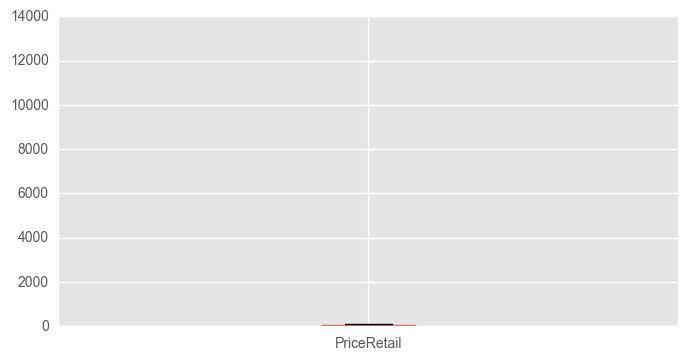

In [321]:
df.PriceRetail.plot(kind = 'box', figsize = (8, 4))

In [322]:
sorted(df['PriceRetail'], reverse = True)

[12819.0,
 11999.0,
 11839.0,
 9199.0,
 8995.0,
 7999.0,
 6824.4899999999998,
 6500.0,
 6000.0,
 4999.0,
 4499.0,
 4043.9899999999998,
 3999.9899999999998,
 3999.9899999999998,
 3999.0,
 3879.0,
 3799.0,
 3749.0,
 3699.0,
 3500.0,
 3499.0,
 3389.0,
 3300.0,
 3299.0,
 3289.0,
 3169.0,
 3159.0,
 3125.0,
 3100.0,
 3000.0,
 2999.0,
 2999.0,
 2999.0,
 2972.9899999999998,
 2875.0,
 2800.0,
 2799.0,
 2695.0,
 2500.0,
 2500.0,
 2500.0,
 2499.0,
 2499.0,
 2499.0,
 2426.9899999999998,
 2369.0,
 2299.0,
 2272.9899999999998,
 2250.0,
 2239.0,
 2233.9899999999998,
 2225.9899999999998,
 2166.9899999999998,
 2109.0,
 2079.9899999999998,
 2000.0,
 2000.0,
 2000.0,
 1999.99,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1960.99,
 1959.99,
 1949.0,
 1900.0,
 1899.0,
 1899.0,
 1899.0,
 1861.99,
 1849.0,
 1848.99,
 1817.99,
 1800.0,
 1800.0,
 1799.99,
 1799.0,
 1799.0,
 1799.0,
 1799.0,
 1779.0,
 1749.99,
 1739.0,
 1739.0,
 1699.0,
 1699.0,
 1

In [323]:
(df['PriceRetail'] > 500).sum()

572

In [324]:
((df['PriceRetail'] < 500) & (df['PriceRetail'] > 200)).sum()

1709

In [325]:
((df['PriceRetail'] < 200) & (df['PriceRetail'] > 100)).sum()

3417

In [326]:
((df['PriceRetail'] < 100) & (df['PriceRetail'] > 50)).sum()

8471

In [327]:
((df['PriceRetail'] < 50) & (df['PriceRetail'] > 20)).sum()

24003

In [328]:
((df['PriceRetail'] < 20) & (df['PriceRetail'] > 0)).sum()

33799

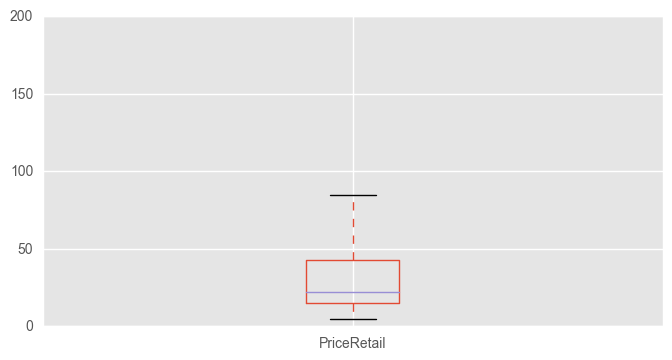

In [329]:
plt.ylim([0,200])

df.PriceRetail.plot(kind = 'box', figsize = (8, 4))

In [330]:
df['Vintage'].unique()

array(['1996', '1997', '1998', 2050, '1995', '2000', '1990', '1993',
       '1994', '1992', '1991', '1989', '1986', '1988', '1977', '2050',
       '1999', '1984', '1982', '1980', '1985', '1983', '1968', '1979',
       '1978', '1970', '1971', '1961', '1975', '1967', '1966', '1950',
       '1953', '1937', '1941', '1964', '1974', '1976', '1981', '1987',
       '1972', '2001', '2005', '1912', '1963', '1973', '2011', '2002',
       '2008', '1933', '1962', '1945', '1921', '1955', '1958', '1954',
       '2010', '1922', '1959', '2009', '2003', '2004', '1940', '2007',
       '1910', '1934', '2006', '1944', '1948', '2012', '1952', '1969',
       '2013', '1908', '2014'], dtype=object)

In [331]:
df['Vintage'] = df['Vintage'].convert_objects(convert_numeric=True)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [332]:
df['Vintage'].dtypes

dtype('int64')

In [333]:
df.groupby(['Vintage', 'Varietal_Name'])['PriceRetail'].count()

Vintage  Varietal_Name        
1908     Other Dessert              1
1910     Madeira                    1
1912     Port                       1
1921     Other Dessert              1
1922     Madeira                    1
         Sherry                     1
1933     Madeira                    1
1934     Madeira                    1
1937     Other Dessert              1
         Port                       1
1940     Madeira                    1
1941     Port                       1
1944     Port                       1
1945     Bordeaux Red Blends        1
         Other Dessert              1
         Port                       1
1948     Madeira                    1
1950     Other Dessert              1
1952     Tempranillo                1
1953     Other Dessert              2
         Port                       1
1954     Madeira                    2
1955     Bordeaux Red Blends        1
         Other Dessert              1
1958     Madeira                    1
         Other Dess

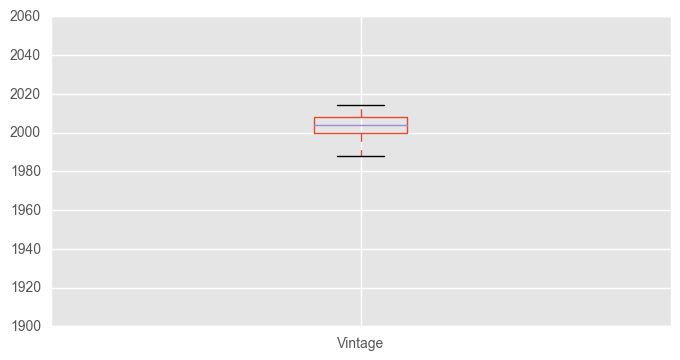

In [334]:
df_wonv = df[df['Vintage'] < 3000]

df_wonv.Vintage.plot(kind = 'box', figsize = (8, 4))

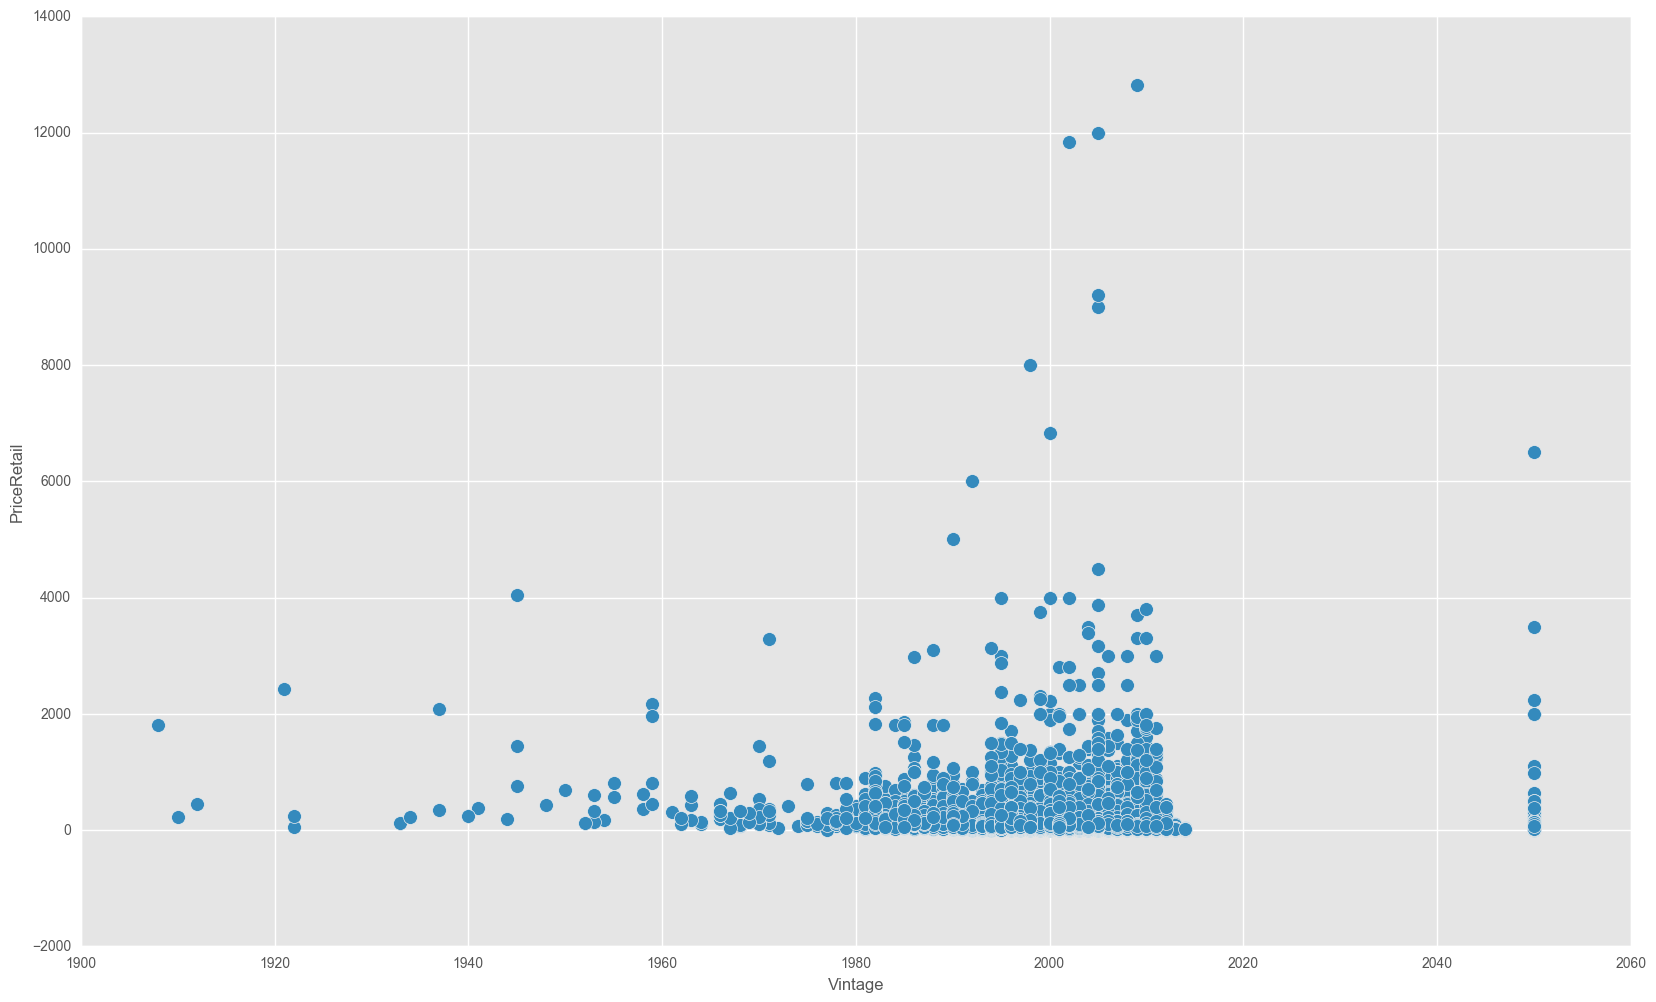

In [335]:
df_wonv.plot(kind = 'scatter', x = 'Vintage', y = 'PriceRetail', s = 100, figsize = (20, 12))

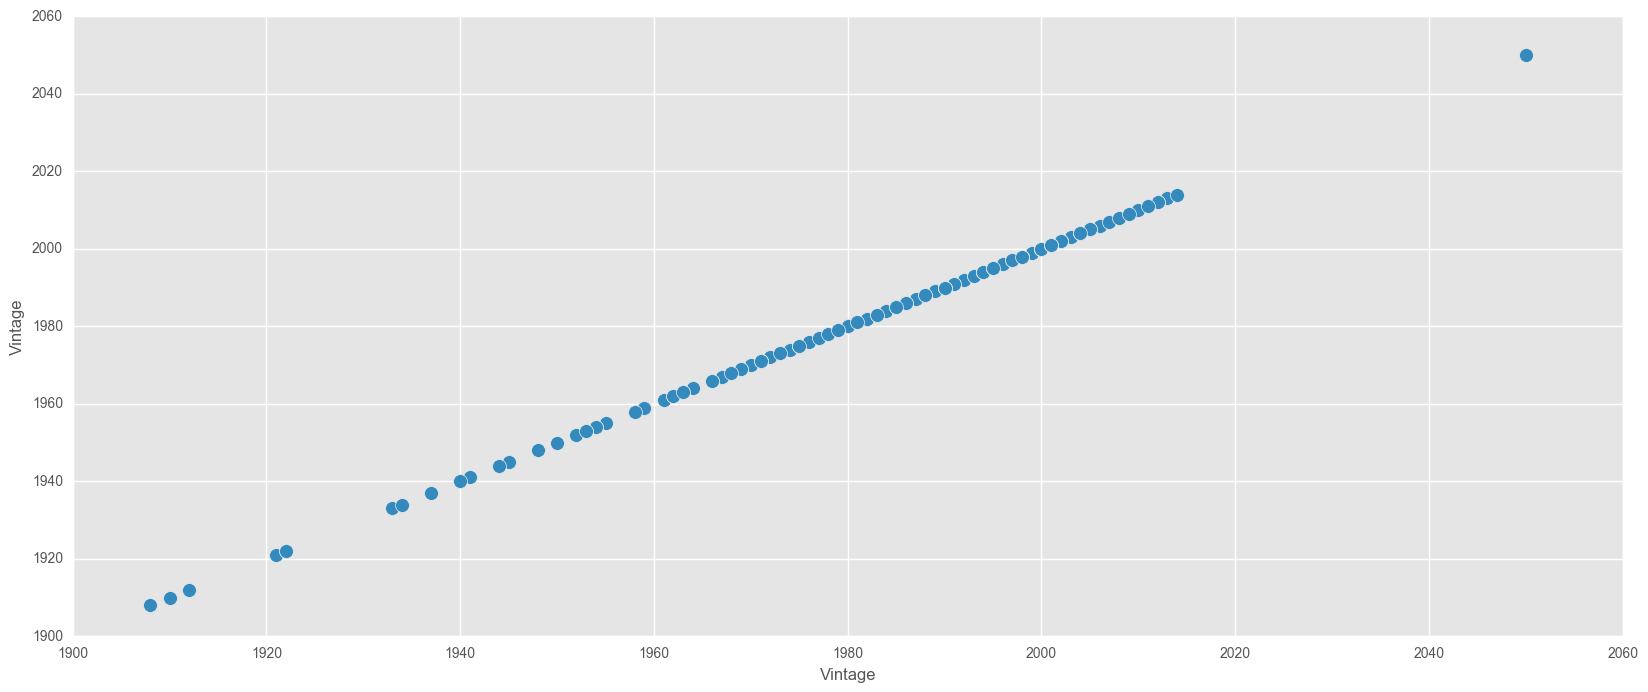

In [336]:
df_wonv.plot(kind = 'scatter', x = 'Vintage', y = 'Vintage', s = 100, figsize = (20, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000034766550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002CD04EF0>]], dtype=object)

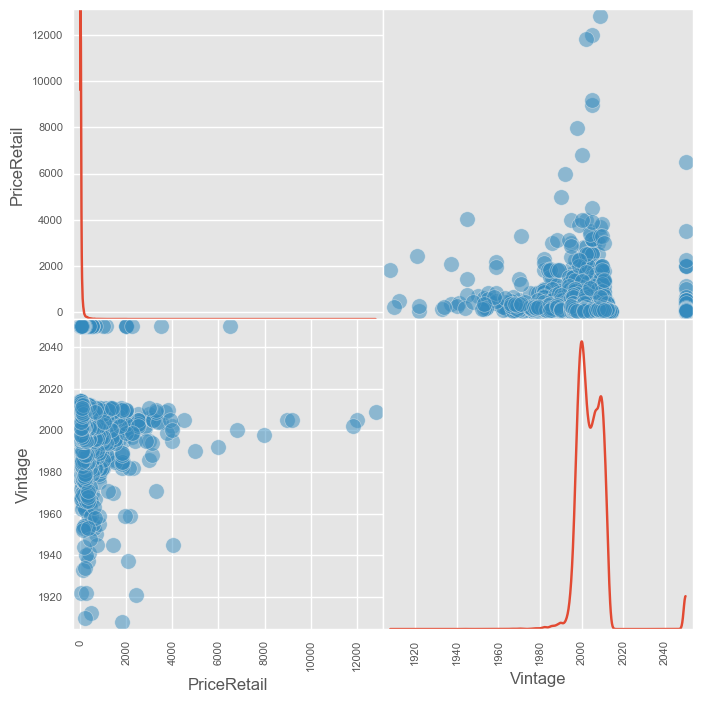

In [337]:
pd.tools.plotting.scatter_matrix(df[ ['PriceRetail', 'Vintage'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

In [338]:
pd.crosstab(df['Varietal_Name'], df.PriceRetail, dropna = False)

PriceRetail,5.0,5.99,6.99,7.99,8.0,8.29,8.49,8.79,8.99,9.0,9.29,9.49,9.79,9.99,10.0,10.19,10.29,10.39,10.49,10.79,...,3499.0,3500.0,3699.0,3749.0,3799.0,3879.0,3999.0,3999.99,4043.99,4499.0,4999.0,6000.0,6500.0,6824.49,7999.0,8995.0,9199.0,11839.0,11999.0,12819.0
Varietal_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albarino,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Barbera,0,0,0,1,0,0,1,0,2,0,0,2,0,4,0,0,0,0,4,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bordeaux Red Blends,0,0,0,37,0,0,4,0,25,0,0,6,0,38,1,0,3,0,17,4,...,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0
Bordeaux White Blends,0,0,0,16,0,1,1,0,16,0,0,3,0,14,0,0,2,0,6,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cabernet Franc,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cabernet Sauvignon,0,1,0,148,0,4,14,6,118,1,12,40,10,171,17,0,18,0,40,21,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Carmenere,0,0,0,3,0,1,0,1,3,0,3,1,2,9,0,0,3,0,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chardonnay,0,0,1,174,0,4,32,8,175,4,20,66,15,293,16,1,23,0,68,23,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chenin Blanc,0,0,0,21,0,0,0,1,14,0,0,5,3,32,2,0,4,0,6,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [339]:
df.rename(columns={
'Id' : 'id',
'Name' : 'name',
'Vintage' : 'vintage',
'Type' : 'type',
'PriceMax' : 'pmax',
'PriceMin' : 'pmin',
'PriceRetail' : 'pretail',
'Appellation_Id' : 'app_id',
'Appellation_Name' : 'app',
'Appellation/Region_Id' : 'reg_id',
'Appellation/Region_Name' : 'reg',
'Appelation Country' : 'country',
'Varietal_Id' : 'varietal_id',
'Varietal_Name' : 'varietal',
'Varietal/WineType_Id' : 'wtype_id',
'Varietal/WineType_Name' : 'wtype',
'Vineyard_Id' : 'vyard_id',
'Vineyard_Name' : 'vyard',
'ProductAttributes/ProductAttribute_Id' : 'desc_id',
'ProductAttributes/ProductAttribute_Name' : 'desc',
'Ratings_HighestScore' : 'rating',
'Community/Reviews_HighestScore' : 'review'
                  }, inplace=True)

In [340]:
df.head(5)

,id,name,vintage,type,pmax,pmin,pretail,app_id,app,reg_id,reg,country,varietal_id,varietal,wtype_id,wtype,vyard_id,vyard,desc_id,desc,rating,review
0,6,Argyle Reserve Pinot Noir 1996,1996,Wine,31.990,31.990,31.99,2474.0,Willamette Valley,103.0,Oregon,United States,143,Pinot Noir,124.0,Red Wines,8182.0,Argyle,0.0,Not Available,0.0,0.0
1,10,Chalk Hill Chardonnay 1997,1997,Wine,47.990,31.990,34.99,2371.0,Sonoma County,101.0,California,United States,140,Chardonnay,125.0,White Wines,8680.0,Chalk Hill Winery,0.0,Not Available,92.0,0.0
2,17,Franciscan Chardonnay 1998,1998,Wine,17.991,17.991,19.99,2398.0,Napa Valley,101.0,California,United States,140,Chardonnay,125.0,White Wines,8800.0,Franciscan Oakville Estate,0.0,Not Available,90.0,0.0
3,20,Sterling Chardonnay 1998,1998,Wine,23.990,19.990,23.99,2416.0,North Coast,101.0,California,United States,140,Chardonnay,125.0,White Wines,8074.0,Sterling Vineyards,0.0,Not Available,0.0,0.0
4,22,Robert Mondavi Fume Blanc 1997,1997,Wine,15.990,15.990,15.99,2398.0,Napa Valley,101.0,California,United States,151,Sauvignon Blanc,125.0,White Wines,8844.0,Robert Mondavi Winery,0.0,Not Available,87.0,0.0


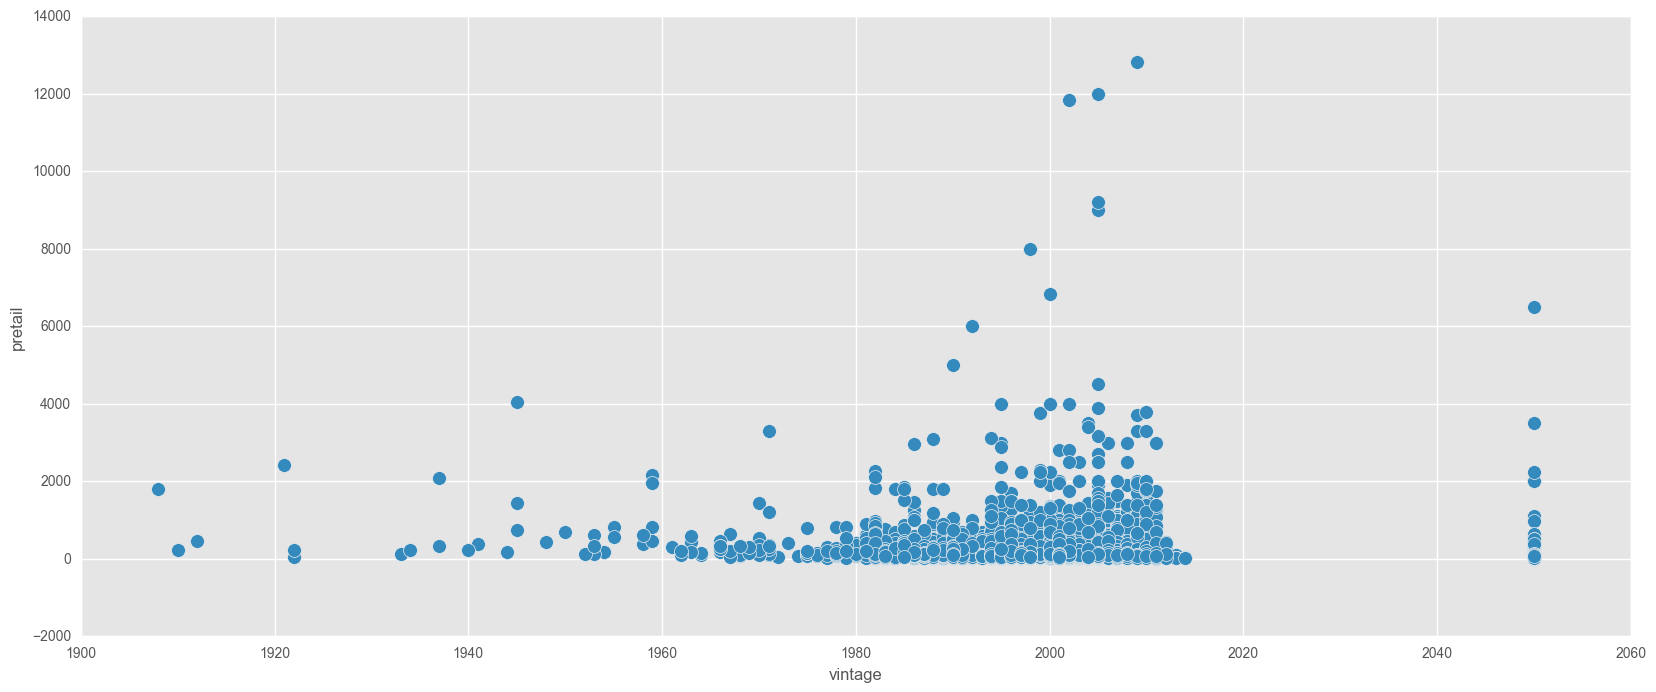

In [341]:
df.plot(kind = 'scatter', x = 'vintage', y = 'pretail', s = 100, figsize = (20, 8))

In [342]:
exp_df = df[['name',
'vintage',
'type',
'pmax',
'pmin',
'pretail',
'app',
'reg',
'country',
'varietal',
'wtype',
'vyard',
'desc',
'rating',
'review']]

In [343]:
exp_df.head(5)

,name,vintage,type,pmax,pmin,pretail,app,reg,country,varietal,wtype,vyard,desc,rating,review
0,Argyle Reserve Pinot Noir 1996,1996,Wine,31.990,31.990,31.99,Willamette Valley,Oregon,United States,Pinot Noir,Red Wines,Argyle,Not Available,0.0,0.0
1,Chalk Hill Chardonnay 1997,1997,Wine,47.990,31.990,34.99,Sonoma County,California,United States,Chardonnay,White Wines,Chalk Hill Winery,Not Available,92.0,0.0
2,Franciscan Chardonnay 1998,1998,Wine,17.991,17.991,19.99,Napa Valley,California,United States,Chardonnay,White Wines,Franciscan Oakville Estate,Not Available,90.0,0.0
3,Sterling Chardonnay 1998,1998,Wine,23.990,19.990,23.99,North Coast,California,United States,Chardonnay,White Wines,Sterling Vineyards,Not Available,0.0,0.0
4,Robert Mondavi Fume Blanc 1997,1997,Wine,15.990,15.990,15.99,Napa Valley,California,United States,Sauvignon Blanc,White Wines,Robert Mondavi Winery,Not Available,87.0,0.0


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


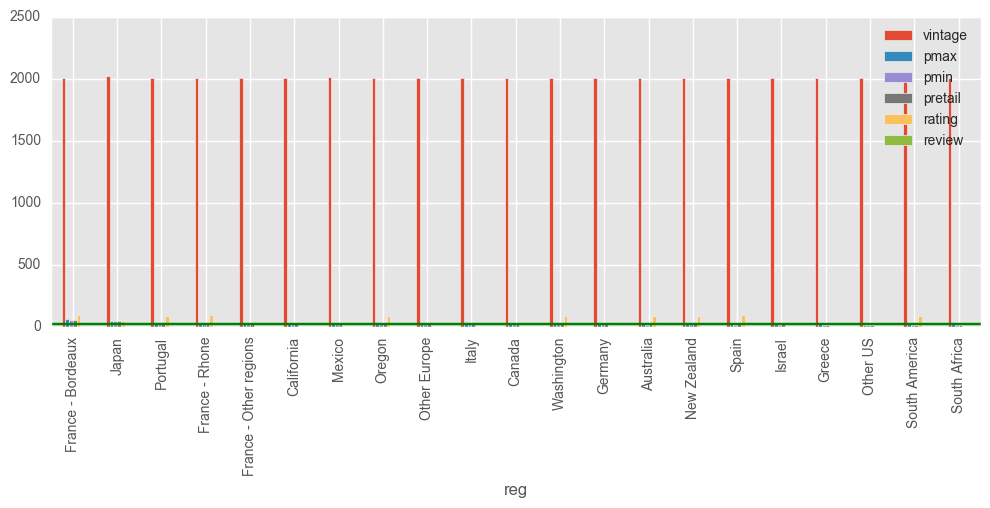

In [344]:
region_exp_df = exp_df.groupby('reg')
plt.figure() 
region_exp_df.median().sort(['pretail'],ascending=False).plot(figsize=(12,4), kind='bar').plot(figsize=(12,4), kind='bar')
plt.axhline(exp_df.pretail.median(), color='g')

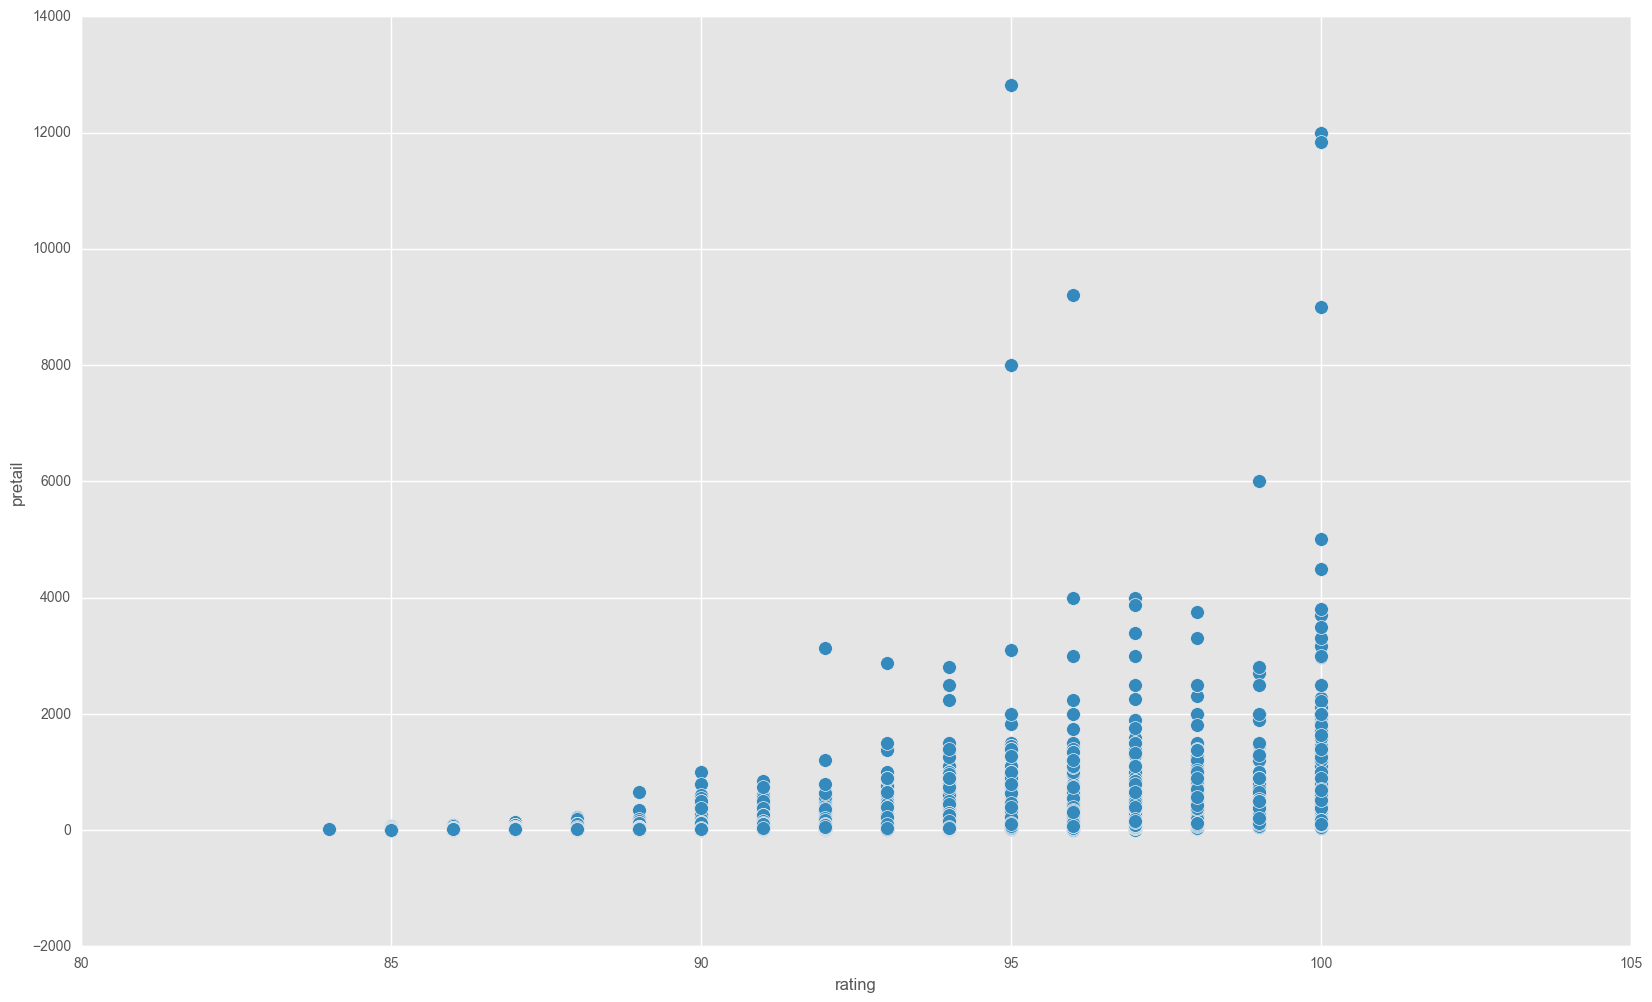

In [345]:
df_rat = df[df['rating'] != 0]

df_rat.plot(kind = 'scatter', x = 'rating', y = 'pretail', s = 100, figsize = (20, 12))

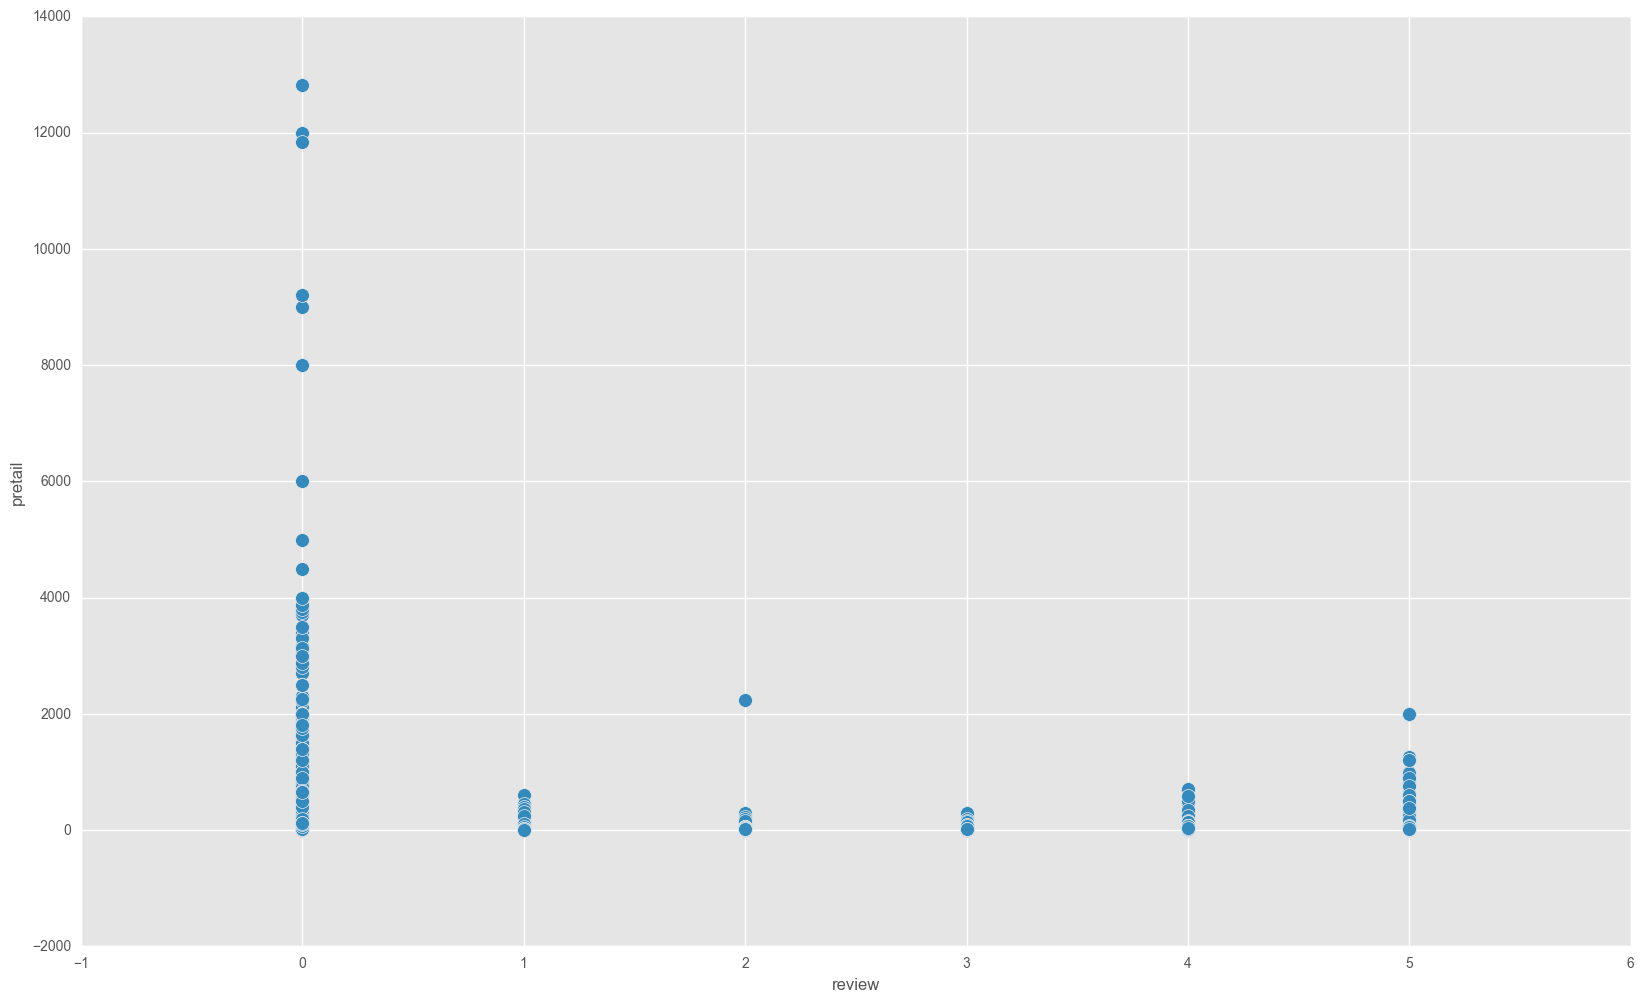

In [346]:
df_rev = df[df['review'] != 0]

df_rat.plot(kind = 'scatter', x = 'review', y = 'pretail', s = 100, figsize = (20, 12))

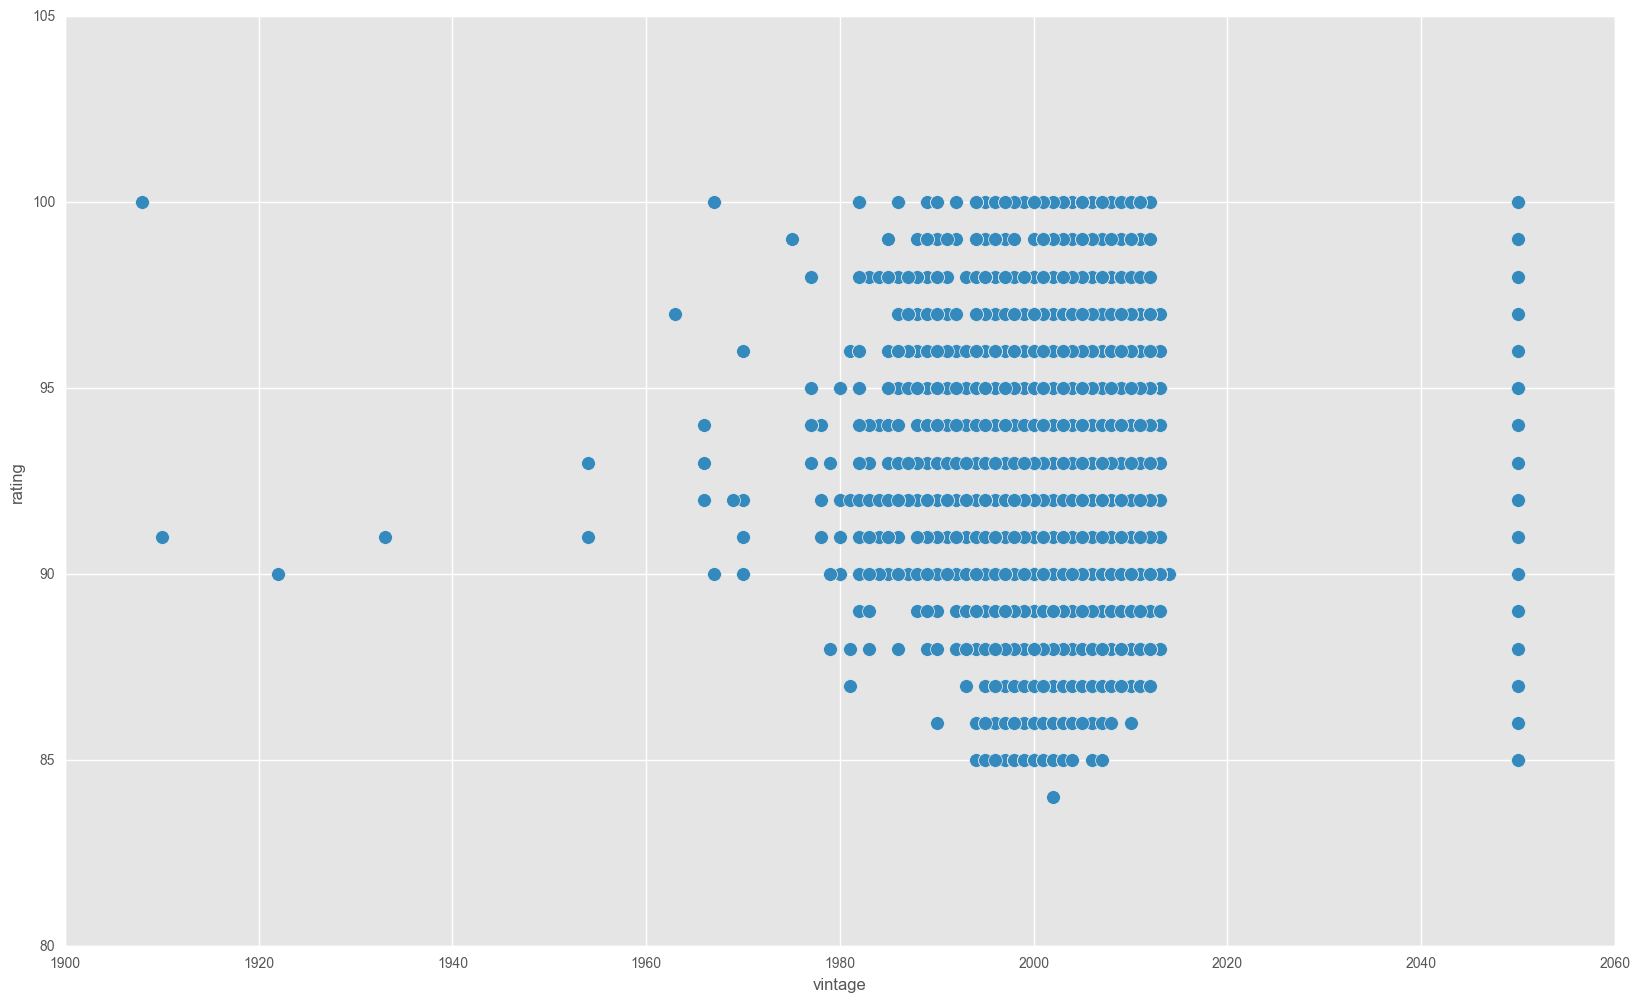

In [347]:
df_rat = df[df['rating'] != 0]

df_rat.plot(kind = 'scatter', x = 'vintage', y = 'rating', s = 100, figsize = (20, 12))

In [348]:
color = df_rat.country.map({'United States': 'red', 'France': 'green', 'Australia': 'blue', 'Italy': 'yellow', 'South America': 'purple'})

In [349]:
cmap = plt.get_cmap('jet')
color = cmap(np.linspace(0, 1, len(df_rat.country)))

In [350]:
df.country.unique()

array(['United States', 'France', 'Australia', 'Italy', 'South America',
       'South Africa', 'Germany', 'Spain', 'Portugal', 'New Zealand',
       'Other Europe', 'Israel', 'Greece', 'Canada', 'Japan', 'Mexico'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000034D2E940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000034BE3828>]], dtype=object)

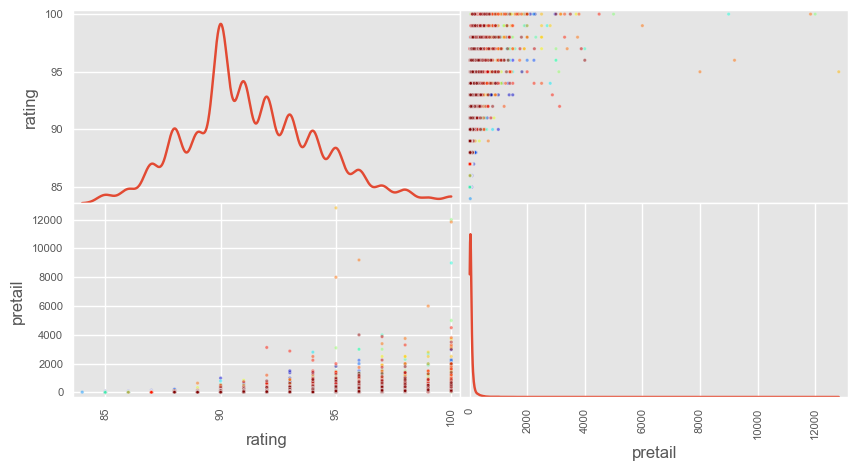

In [351]:
pd.tools.plotting.scatter_matrix(
    df_rat[ ['rating', 'pretail'] ],
    diagonal = 'kde', s = 25, c = color, figsize = (10, 5)
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000352E6860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000003936B3C8>]], dtype=object)

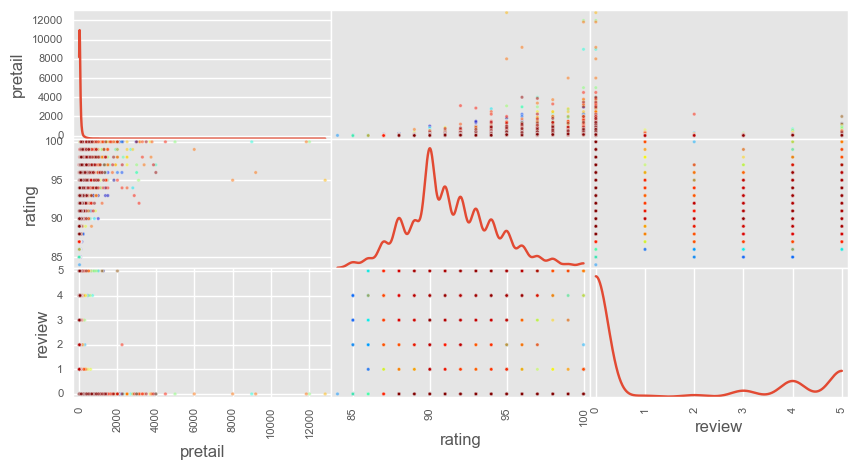

In [352]:
pd.tools.plotting.scatter_matrix(
    df_rat[ ['pretail', 'rating', 'review'] ],
    diagonal = 'kde', s = 25, c = color, figsize = (10, 5)
)

In [353]:
cols = ['country'
        ]

df = pd.get_dummies(df, columns = cols)

In [354]:
df.head(50)

,id,name,vintage,type,pmax,pmin,pretail,app_id,app,reg_id,reg,varietal_id,varietal,wtype_id,wtype,vyard_id,vyard,desc_id,desc,rating,review,country_Australia,country_Canada,country_France,country_Germany,country_Greece,country_Israel,country_Italy,country_Japan,country_Mexico,country_New Zealand,country_Other Europe,country_Portugal,country_South Africa,country_South America,country_Spain,country_United States
0,6,Argyle Reserve Pinot Noir 1996,1996,Wine,31.990,31.990,31.99,2474.0,Willamette Valley,103.0,Oregon,143,Pinot Noir,124.0,Red Wines,8182.0,Argyle,0.0,Not Available,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10,Chalk Hill Chardonnay 1997,1997,Wine,47.990,31.990,34.99,2371.0,Sonoma County,101.0,California,140,Chardonnay,125.0,White Wines,8680.0,Chalk Hill Winery,0.0,Not Available,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,17,Franciscan Chardonnay 1998,1998,Wine,17.991,17.991,19.99,2398.0,Napa Valley,101.0,California,140,Chardonnay,125.0,White Wines,8800.0,Franciscan Oakville Estate,0.0,Not Available,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,20,Sterling Chardonnay 1998,1998,Wine,23.990,19.990,23.99,2416.0,North Coast,101.0,California,140,Chardonnay,125.0,White Wines,8074.0,Sterling Vineyards,0.0,Not Available,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22,Robert Mondavi Fume Blanc 1997,1997,Wine,15.990,15.990,15.99,2398.0,Napa Valley,101.0,California,151,Sauvignon Blanc,125.0,White Wines,8844.0,Robert Mondavi Winery,0.0,Not Available,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,23,Sterling Sauvignon Blanc 1998,1998,Wine,16.990,16.990,16.99,2416.0,North Coast,101.0,California,151,Sauvignon Blanc,125.0,White Wines,8074.0,Sterling Vineyards,0.0,Not Available,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,41,Kenwood Sonoma County Sauvignon Blanc 1998,1998,Wine,14.391,14.391,15.99,2371.0,Sonoma County,101.0,California,151,Sauvignon Blanc,125.0,White Wines,8905.0,Kenwood Vineyards,0.0,Not Available,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,45,Chateau St. Jean Merlot 1997,1997,Wine,26.990,26.990,29.99,2371.0,Sonoma County,101.0,California,138,Merlot,124.0,Red Wines,5922.0,Chateau St. Jean,0.0,Not Available,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,50,Pacific Echo Brut Rose,2050,Wine,28.990,24.990,24.99,2416.0,North Coast,101.0,California,2050,Ros�,123.0,Champagne & Sparkling,8872.0,Pacific Echo,0.0,Not Available,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,52,Chateau St. Jean Belle Terre Chardonnay 1996,1996,Wine,22.041,22.041,24.49,2371.0,Sonoma County,101.0,California,140,Chardonnay,125.0,White Wines,5922.0,Chateau St. Jean,0.0,Not Available,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [355]:
df_r = df[df.rating != 0]
df_rr = df_r[df_r.review != 0]

df_rr.shape

(10266, 37)

# Predicting Price with OLS Regression

In [356]:
def Xy(df_rr):
    X = df_rr[ ['pretail', 'vintage'] ] # X is a DataFrame

    y = df_rr.rating # y is a Series

    return X, y

X, y = Xy(df_rr)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.252e+06
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:58   Log-Likelihood:                -22412.
No. Observations:               10266   AIC:                         4.483e+04
Df Residuals:                   10264   BIC:                         4.484e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
pretail        0.0182      0.000     55.751      0.000         0.018     0.019
vintage        0.0451   1.23e-05   3661.664      0.000         0.045     0.045
==============================================================================
Omnibus:                     3319.764   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115697.580
Skew:                          -0.891   Prob(JB):                         0.00
Kurtosis:                      19.349   Cond. No.                         30.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [357]:
df_rr.corr()

,vintage,pmax,pmin,pretail,app_id,reg_id,wtype_id,vyard_id,desc_id,rating,review,country_Australia,country_Canada,country_France,country_Germany,country_Greece,country_Israel,country_Italy,country_Japan,country_Mexico,country_New Zealand,country_Other Europe,country_Portugal,country_South Africa,country_South America,country_Spain,country_United States
vintage,1.000000,0.079543,-0.057559,-0.065406,-0.014408,-0.055921,0.129326,0.045224,0.078284,-0.063107,0.058167,-0.034413,-0.011050,0.067054,-0.000485,0.016784,-0.001701,-0.024978,NaN,NaN,0.008637,-0.009989,0.188413,-0.006224,-0.009019,0.032430,-0.060747
pmax,0.079543,1.000000,0.132349,0.139882,-0.017262,0.029456,-0.006454,-0.024708,0.038584,0.076669,0.009938,-0.019362,-0.000345,0.066971,-0.008569,-0.000039,-0.002322,-0.006016,NaN,NaN,-0.016630,-0.004129,0.068199,-0.011791,-0.029051,-0.026461,0.002121
pmin,-0.057559,0.132349,1.000000,0.957912,0.013579,0.144585,-0.080835,0.030989,0.072385,0.450932,0.033857,-0.046208,0.012854,0.157853,-0.016728,-0.012404,-0.002236,0.008297,NaN,NaN,-0.043137,0.008091,0.009342,-0.043030,-0.067992,-0.060024,0.026248
pretail,-0.065406,0.139882,0.957912,1.000000,0.020016,0.153068,-0.089676,0.027229,0.081409,0.481397,0.045384,-0.038368,0.011897,0.170102,-0.017907,-0.012869,-0.003632,0.008468,NaN,NaN,-0.047754,0.003466,0.007148,-0.047447,-0.075133,-0.066446,0.024753
app_id,-0.014408,-0.017262,0.013579,0.020016,1.000000,0.402069,0.009234,0.132691,-0.050019,0.076666,-0.057704,0.474182,-0.017439,0.236425,-0.065160,-0.034057,-0.013678,-0.163485,NaN,NaN,0.252821,-0.051437,-0.065696,-0.101844,-0.212832,0.311160,-0.455877
reg_id,-0.055921,0.029456,0.144585,0.153068,0.402069,1.000000,-0.038448,0.230531,0.008165,0.113864,-0.104688,-0.106809,-0.005892,0.727628,-0.026649,-0.010301,-0.005285,-0.101465,NaN,NaN,-0.046062,-0.013246,-0.029505,-0.043277,-0.089051,-0.084007,-0.204911
wtype_id,0.129326,-0.006454,-0.080835,-0.089676,0.009234,-0.038448,1.000000,-0.025880,-0.075420,-0.074097,-0.025533,-0.013798,0.119034,-0.058921,0.109768,0.039555,-0.008267,-0.088274,NaN,NaN,0.110957,0.114255,0.315580,0.037069,-0.056876,-0.034223,0.002542
vyard_id,0.045224,-0.024708,0.030989,0.027229,0.132691,0.230531,-0.025880,1.000000,0.026790,0.021403,-0.053992,-0.093224,-0.011552,0.201079,-0.021699,-0.020018,-0.010332,-0.009763,NaN,NaN,-0.013658,0.003009,-0.010152,-0.048948,0.034451,0.090208,-0.110025
desc_id,0.078284,0.038584,0.072385,0.081409,-0.050019,0.008165,-0.075420,0.026790,1.000000,0.068625,0.039352,-0.070806,-0.007648,0.102328,-0.005776,-0.000690,-0.001246,-0.007254,NaN,NaN,-0.034781,-0.011254,-0.009906,-0.012653,0.009858,-0.001447,0.000897
rating,-0.063107,0.076669,0.450932,0.481397,0.076666,0.113864,-0.074097,0.021403,0.068625,1.000000,0.107715,0.081902,0.003961,0.091576,0.008659,-0.033378,-0.013674,0.009432,NaN,NaN,-0.070650,0.003120,0.041953,-0.110597,-0.105346,-0.056533,0.023321


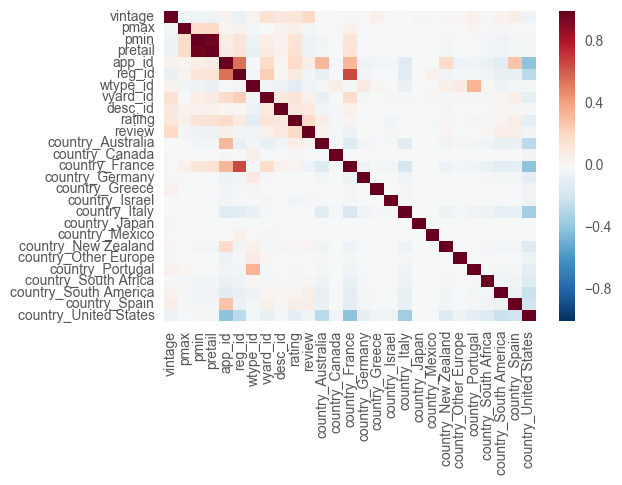

In [358]:
sns.heatmap(df.corr())

In [359]:
def Xy(df_rat):
    X = df_rat[ ['rating', 'reg_id'] ] # X is a DataFrame

    y = df_rat.pretail # y is a Series

    return X, y

X, y = Xy(df_rat)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pretail   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     2462.
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:22:00   Log-Likelihood:            -2.3232e+05
No. Observations:               34286   AIC:                         4.646e+05
Df Residuals:                   34284   BIC:                         4.647e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
rating         0.6933      0.013     51.777      0.000         0.667     0.720
reg_id         0.0099      0.000     25.968      0.000         0.009     0.011
==============================================================================
Omnibus:                    86223.530   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2282501700.681
Skew:                          27.626   Prob(JB):                         0.00
Kurtosis:                    1265.808   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [360]:
def Xy_2(df):
    X = df[ ['rating'] ] # X is a DataFrame

    y = df.pretail # y is a Series

    return X, y

X, y = Xy_2(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pretail   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     7331.
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:22:00   Log-Likelihood:            -4.7413e+05
No. Observations:               72906   AIC:                         9.483e+05
Df Residuals:                   72905   BIC:                         9.483e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
rating         0.8165      0.010     85.619      0.000         0.798     0.835
==============================================================================
Omnibus:                   197201.645   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      11037124043.280
Skew:                          33.201   Prob(JB):                         0.00
Kurtosis:                    1907.971   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [361]:
def Xy_3(df_rat):
    X = df_rat[ ['rating'] ] # X is a DataFrame
    X = sm.add_constant(X)

    y = df_rat.pretail # y is a Series

    return X, y

X, y = Xy_3(df_rat)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pretail   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     4557.
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:22:00   Log-Likelihood:            -2.3063e+05
No. Observations:               34286   AIC:                         4.613e+05
Df Residuals:                   34284   BIC:                         4.613e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -2299.1082     35.148    -65.413      0.000     -2367.999 -2230.217
rating        25.9442      0.384     67.505      0.000        25.191    26.697
==============================================================================
Omnibus:                    89225.333   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3018837879.529
Skew:                          30.124   Prob(JB):                         0.00
Kurtosis:                    1455.425   Cond. No.                     2.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predicting Price on Rating

In [362]:
predict_X = pd.DataFrame({'rating': [89, 90, 93]}, columns = ['rating'])
predict_X = sm.add_constant(predict_X)

predict_X

,const,rating
0,1,89
1,1,90
2,1,93


In [363]:
predict_y = model.predict(predict_X)

predict_y

array([   9.92289474,   35.8670648 ,  113.69957497])

In [364]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.68268949213708585

# Predicting prices on ratings doesn't yeild a good cumulative distribution function value - maybe because the dataset contains outliers

In [365]:
print "For normally distributed data:"
for z in [1, 1.65, 2, 3]:
    print "\t- {:3.2f}% of it is between +/- {:1.2f} sigma(s)".\
        format((stats.norm.cdf(z) - stats.norm.cdf(-z)) * 100, z)

For normally distributed data:
	- 68.27% of it is between +/- 1.00 sigma(s)
	- 90.11% of it is between +/- 1.65 sigma(s)
	- 95.45% of it is between +/- 2.00 sigma(s)
	- 99.73% of it is between +/- 3.00 sigma(s)


In [373]:
def drop_outliers(df_rr):
    print 'Dropping outliers'
    print '- n (before) =', df_rr.shape[0]

    Q1 = df_rr.pretail.quantile(.25)
    Q2 = df_rr.pretail.quantile(.5)
    Q3 = df_rr.pretail.quantile(.75)
    IQR = Q3 - Q1

    print '- Q1         =', Q1, '($)'
    print '- Q2/Median  =', Q2, '($)'
    print '- Q3         =', Q3, '($)'

    df_rr.drop(df_rr[(df_rr.pretail< Q1 - 1.5 * IQR) | (df_rr.pretail > Q3 + 1.5 * IQR)].index, inplace = True)

    print '- n (after)  =', df.shape[0]
    

drop_outliers(df_rr)

Dropping outliers
- n (before) = 9245
- Q1         = 16.0 ($)
- Q2/Median  = 20.0 ($)
- Q3         = 32.99 ($)
- n (after)  = 72906


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [383]:
predict_X = pd.DataFrame({'rating': [89, 90, 93]}, columns = ['rating'])
predict_X = sm.add_constant(predict_X)

predict_X

,const,rating
0,1,89
1,1,90
2,1,93


In [377]:
predict_y = model.predict(predict_X)

predict_y

array([ 19.19709609,  23.20658159,  35.23503809])

# Price prediction adjusted but the CDF did not  - troubleshoot?

In [378]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.68268949213708585

In [367]:
model = smf.ols(formula = 'pretail ~ rating', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pretail   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1590.
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:22:00   Log-Likelihood:            -4.7357e+05
No. Observations:               72906   AIC:                         9.472e+05
Df Residuals:                   72904   BIC:                         9.472e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     27.2912      0.815     33.482      0.000        25.694    28.889
rating         0.5182      0.013     39.869      0.000         0.493     0.544
==============================================================================
Omnibus:                   198486.604   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      11494220416.372
Skew:                          33.779   Prob(JB):                         0.00
Kurtosis:                    1947.024   Cond. No.                         86.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [368]:
model = smf.ols(formula = 'pretail ~ rating', data = df_rr).fit()

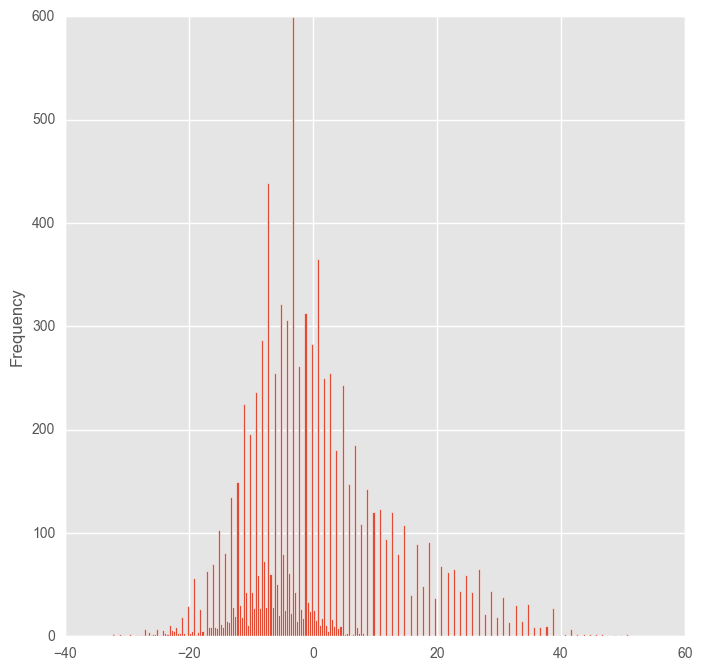

In [369]:
model.resid.plot(kind = 'hist', bins = 250, figsize = (8, 8))

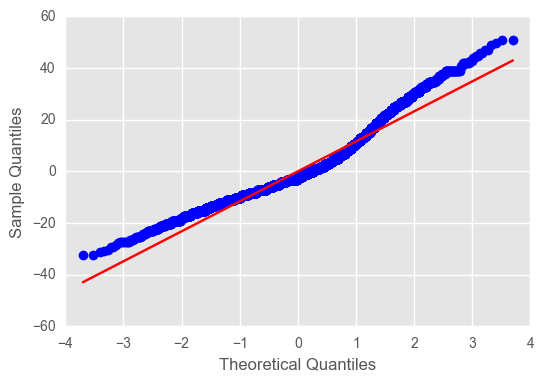

In [370]:
sm.qqplot(model.resid, line = 's')

pass

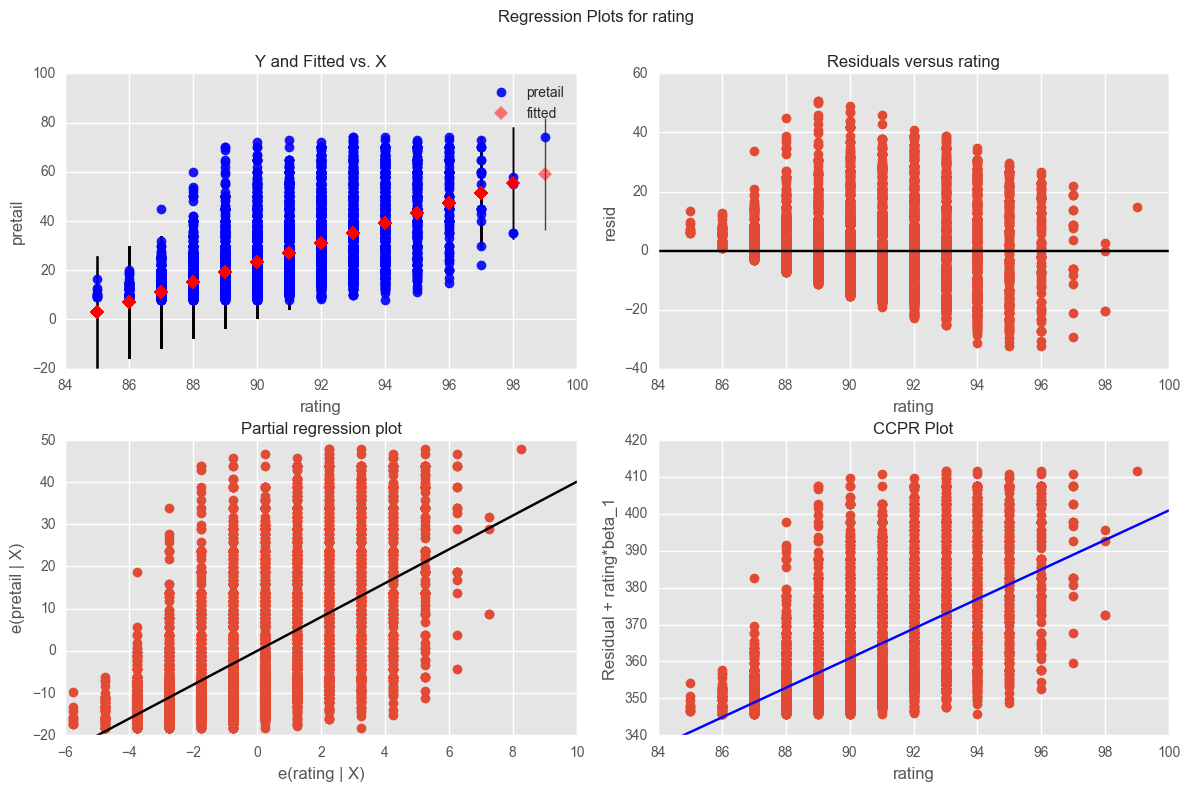

In [371]:
sm.graphics.plot_regress_exog(model, 'rating', fig = plt.figure(figsize = (12, 8)))

pass

#    WORK IN PROGRESS
   

In [372]:
df['coll'] = 

df.head(5)

SyntaxError: invalid syntax (<ipython-input-372-493fc2b86161>, line 1)

In [ ]:
import wbpy
from pprint import pprint

c_api = wbpy.ClimateAPI()

c_api.ARG_DEFINITIONS["instrumental_types"]
{'pr': 'Precipitation (rainfall and assumed water equivalent), in millimeters',
 'tas': 'Temperature, in degrees Celsius'}
c_api.ARG_DEFINITIONS["instrumental_intervals"]
['year', 'month', 'decade']
iso_and_basin_codes = ['AU']

dataset = c_api.get_instrumental(data_type='tas', interval='year', locations=iso_and_basin_codes)
dataset


#'United States', 'France', 'Australia', 'Italy', 'South America',
#      'South Africa', 'Germany', 'Spain', 'Portugal', 'New Zealand',
#     'Other Europe', 'Israel', 'Greece', 'Canada', 'Japan', 'Mexico'

In [ ]:
import requests

response = requests.get('http://climatedataapi.worldbank.org/climateweb/rest/v1/country/annualavg/tas/2010/2013/FR')

reponse